###  Clas6 dihadron paper results outline:
<list>
    <li> di-pion results:
    <list> 
        <li>  SMC plot for one target type
        <li>  correlation functions for all targets (top), A/D ratio (bottom)
        <li>  slices
    </list>
    <li> di-pion results:
    <list> 
        <li>  SMC plot for one target type
        <li>  correlation functions for all targets (top), A/D ratio (bottom) 
        <li>  slices
    </list>
</list>

All other SMC plots should go in the supplementary

In [2]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [3]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util,correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


<module 'R2h_module' from '/home/sebouh/di-hadron/R2h_module.py'>

In [4]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

mixtag='xQ2_'
dfs_mixed = {a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb GiBUU_D GiBUU_C GiBUU_Fe GiBUU_Pb".split()}
#dfs_mixed = {a : root_pandas.read_root(f"/home/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [5]:
directory = "."
dfs_data = {a : root_pandas.read_root(f"{directory}/Pairs_%s.root" %a.replace("D_",""),a) for a in "D_C C D_Fe Fe Pb D_Pb".split()}


dfs_trigger = {a : root_pandas.read_root(f"{directory}/Pairs_%s.root" %a.replace("D_",""),a+"_trigger") for a in "D_C C D_Fe Fe Pb D_Pb".split()}



In [6]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    dfs_trigger['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    dfs_data['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
print (dfs_trigger.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])


In [7]:
print(set(dfs_data['GiBUU_C'].h2_pid))

{211, 2212, -211}


In [8]:

#now load MC
#dfs_data.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a) for a in "Pb D C Fe".split()})




In [9]:
#dfs_trigger.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a + "_trigger") for a in "Pb D C Fe".split()})



In [10]:
for dct in dfs_mixed,dfs_data, dfs_trigger:
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])
    print(dct.keys())

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])


In [11]:
for df in dfs_data.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_mixed.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_trigger.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)

In [ ]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_data.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    if key in dfs_mixed.keys() and 'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    
    if key in dfs_mixed.keys():# and 'drap' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('h1_e=nu*h1_z',inplace=True)
        dfs_mixed[key].eval('h2_e=nu*h2_z',inplace=True)
        dfs_mixed[key].eval(f'drap=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
        #dfs_mixed[key].eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    data_trigger_cuts = dfs_data[key]#R2h_module.applyCuts(dfs_data[key],nomCuts=True)
    #if key in dfs_mixed.keys():
    #    mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key],nomCuts=True)
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = dfs_mixed[key]
    #print(mixed_trigger_cuts)
    dfs_data[key + '_2pi'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
    dfs_data[key + '_pi_p'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=True, minPt=np.sqrt(0.005))
    dfs_trigger[key] = R2h_module.applyCuts(dfs_trigger[key],name='default',isMC=isMC,isTrigger=True,
                                 nomCuts=True, minPt=np.sqrt(0.005))
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key])    
        dfs_mixed[key + '_2pi'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
        dfs_mixed[key + '_pi_p'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=True, minPt=np.sqrt(0.005))
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_pid*h2_pid)<0, opposite charge pions 563752  (47.86  %)
kinematic limits for h2_z 536678  (95.20  %)
kinematic limits for dphi 536114  (99.89  %)
kinematic limits for pair_mass 486912  (90.82  %)
leading hadrons are pions 144402  (29.66  %)
0.2<h2_p<5.0 144402  (100.00  %)
0.2<h1_p<5.0 144402  (100.00  %)
pt>0.07071067811865475 GeV 140381  (97.22  %)
25 degree separation between pion and electron.  This is a dumb cut 140381  (100.00  %)
10<h2_th 140381  (100.00  %)
Theta/P fiducial region selected for secondary hadron 129106  (91.97  %)
10< h1_th 129106  (100.00  %)
Theta/P fiducial region selected for trigger hadron 129106  (100.00  %)
Nom cuts for the pair applied (pi pi) 45736  (35.43  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
s

secondary hadrons are protons 374044  (17.93  %)
leading hadrons are pions 241649  (64.60  %)
0.2<h2_p<5.0 241546  (99.96  %)
0.2<h1_p<5.0 241535  (100.00  %)
pt>0.07071067811865475 GeV 233461  (96.66  %)
25 degree separation between pion and electron.  This is a dumb cut 233461  (100.00  %)
10<h2_th 233461  (100.00  %)
Theta/P fiducial region selected for secondary hadron 233461  (100.00  %)
10< h1_th 233461  (100.00  %)
Theta/P fiducial region selected for trigger hadron 233461  (100.00  %)
Nom cuts for the pair applied (pi p) 70000  (29.98  %)
Entries before cut  4462608
Q2>1.0 and Q2<4.0 4462608  (100.00  %)
0.2<h1_p<5.0  4459167  (99.92  %)
inelasticity < 0.85 4459167  (100.00  %)
h1_pid = pions (trigger) 1372417  (30.78  %)
2.2 < nu <4.2 1354502  (98.69  %)
pt>0.07071067811865475 GeV 1324255  (97.77  %)
25 degree separation between pion and electron.  This is a dumb cut 1324255  (100.00  %)
10< h1_th 1324255  (100.00  %)
Theta/P fiducial region selected for trigger hadron 1324255

1.0< Q2 <4.0 859360  (100.00  %)
2.2 < nu < 4.2 846060  (98.45  %)
secondary hadrons are pions 368028  (43.50  %)
(h1_pid*h2_pid)<0, opposite charge pions 148543  (40.36  %)
kinematic limits for h2_z 145638  (98.04  %)
kinematic limits for dphi 145576  (99.96  %)
kinematic limits for pair_mass 143429  (98.53  %)
leading hadrons are pions 143429  (100.00  %)
0.2<h2_p<5.0 143429  (100.00  %)
0.2<h1_p<5.0 143429  (100.00  %)
pt>0.07071067811865475 GeV 140113  (97.69  %)
25 degree separation between pion and electron.  This is a dumb cut 140113  (100.00  %)
10<h2_th 140113  (100.00  %)
Theta/P fiducial region selected for secondary hadron 131880  (94.12  %)
10< h1_th 131880  (100.00  %)
Theta/P fiducial region selected for trigger hadron 131880  (100.00  %)
Nom cuts for the pair applied (pi pi) 55580  (42.14  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 859360  (100.00  %)
2.2 < nu < 4.2 846060  (98.45  %)
secondary hadrons are protons 478032  (56.50  %)
leading hadro

In [ ]:
dfs_mc= {f"{a}_2pi":root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",a) for a in "C Fe Pb".split()}
dfs_mc["D_2pi"] = root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")

In [ ]:
#binning info
yrange_dfdy =(0,3)
bins_dfdy = (6,8)
#yrange_dfdy =(-0,3.5)
#bins_dfdy = (7,8)

In [ ]:
for a in 'D C Fe Pb'.split():
    for x in "Q2 nu nu/5.014 W".split():
        print(a, x, "%.2f"%np.mean(dfs_data[a+"_2pi"].eval(x)))

In [17]:
#smc plot

def dphi_deta_plot_3_proj(df,df_mixed,deta_range=(-1.5,2.5),bins=20,df_triggers=None, reflect=True,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=0.003, 
                          normalizeMixedAt00=False,text="",zlims=None,ylims=None,fourierOrder=3,
                         df_mc = None):
    
    def offset(a, amount=np.pi/2):
        return a+2*np.pi*(a<-np.pi+amount)-2*np.pi*(a>=np.pi+amount)
    if type(bins)==int:
        bins = [bins,bins]
    dphi_range = (-np.pi/2,3*np.pi/2)
    if fig == None:
        fig = plt.figure(figsize=(20,12))
    ax1 = fig.add_subplot(231, projection='3d')
    
    elev = 70
    azim = -112.5#-135
    ax1.view_init(azim=azim,elev = elev)
    
    if df_triggers is None:
        denom = len(df)*2*np.pi/bins[0]*(deta_range[1]-deta_range[0])/bins[1]
    else:
        denom = len(df_triggers)*2*np.pi/bins[0]*(deta_range[1]-deta_range[0])/bins[1]
    
    #hist1,xedges, yedges = np.histogram2d([2,2,2,2],[0,0,0,0], bins=bins,range=[deta_range, dphi_range])
    def hist(df):
            ret = np.histogram2d(df.drap, df.dphi, bins=bins, range=[deta_range, dphi_range])
            if not reflect:
                return ret
            else :
                tmp = np.divide(np.add(ret[0],np.histogram2d(df.drap, offset(-df.dphi), bins=bins, range=[deta_range, dphi_range])[0]),2)
                return (tmp, ret[1],ret[2])
    def hist_mc(df):
            ret = np.histogram2d(df.drap_truth, abs(df.dphi_truth), bins=bins, range=[deta_range, dphi_range], weights=df.weight_truth)
            if not reflect:
                return ret
            else :
                tmp = np.divide(np.add(ret[0],np.histogram2d(df.drap_truth, offset(-abs(df.dphi_truth)), bins=bins, range=[deta_range, dphi_range], weights=df.weight_truth)[0]),2)
                return (tmp, ret[1],ret[2])  
        
    #hist1, xedges, yedges = np.histogram2d(df[i].diff_rap_cm, abs(df[i].diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
    hist1, xedges, yedges = hist(df)
    dh1 = np.sqrt(hist1)
    hist1 = np.divide(hist1, denom)
    dh1 = np.divide(dh1, denom)

    #correct for the efficiency
    if df_mc is not None:
        eff = hist_mc(df_mc.query("h2_z>0"))[0]/hist_mc(df_mc)[0]
        print("efficiency:", eff)
        hist1 =  hist1/eff
        dh1 = dh1/eff

    #print(xedges)
    hist2, xedges, yedges = hist(df_mixed)
    dh2 = np.sqrt(hist2)

    hist2 = np.divide(hist2,len(df_mixed)*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
    dh2 = np.divide(dh2,len(df_mixed)*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))

    hist3 = np.divide(hist1,hist2)
    dh3 = hist3*np.hypot(dh1/hist1,dh2/hist2)
    
    
    
    xpos, ypos = np.meshgrid(np.add(xedges[:-1],xedges[1:])/2, np.add(yedges[:-1],yedges[1:])/2)
    zpos = 0
    #help(hist1.transpose)
    
    for i in range(len(xedges)-1):
        if(xedges[i]>projyrange[0]):
            break
    print("i=",i)
    def plot2d(ax, hist,vmin,vmax):
        if projyrange != deta_range:
            ax.plot_surface(xpos.transpose()[:i+1].transpose(), ypos.transpose()[:i+1].transpose(), hist[:i+1].transpose(), cmap=viridis,edgecolor='k')
            ax.plot_surface(xpos.transpose()[i:].transpose(), ypos.transpose()[i:].transpose(), hist[i:].transpose(), cmap=autumn,edgecolor='k')
        else :
            ax.plot_surface(xpos, ypos, hist.transpose(), cmap=viridis,edgecolor='k',
                           vmin=vmin, vmax=vmax)
    plot2d(ax1,hist1,vmin=zlims[0][0],vmax=zlims[0][1])
    ax1.set_xlabel("$\\Delta y$")
    ax1.set_ylabel("$\\Delta\\phi$ [rad]")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_title("$S(\\Delta\\phi,\\Delta y)$",rotation=0)
    ax1.set_xlim(*deta_range)
    ax1.set_ylim(*dphi_range)
    
    
    ax2 = fig.add_subplot(232, projection='3d')
    ax2.view_init(azim=azim,elev = elev)
    #surf = ax2.plot_surface(xpos, ypos, hist2.transpose(), cmap=viridis,edgecolor='k')
    plot2d(ax2,hist2,vmin=zlims[1][0],vmax=zlims[1][1])
    ax2.set_xlabel("$\\Delta y$")
    ax2.set_ylabel("$\\Delta\\phi$ [rad]")
    ax2.zaxis.set_rotate_label(False)
    ax2.set_title("$M(\\Delta\\phi,\\Delta y)$",rotation=0)
    ax2.set_xlim(*deta_range)
    ax2.set_ylim(*dphi_range)
    
    
    
    ax3 = fig.add_subplot(233, projection='3d')
    ax3.view_init(azim=azim,elev = elev)
    #surf = ax3.plot_surface(xpos, ypos, hist3.transpose(), cmap=viridis,edgecolor='k')
    plot2d(ax3,hist3,vmin=zlims[2][0],vmax=zlims[2][1])
    ax3.set_xlabel("$\\Delta y$")
    ax3.set_ylabel("$\\Delta\\phi$ [rad]")
    ax3.zaxis.set_rotate_label(False)
    ax3.set_title("$C(\\Delta\\phi,\\Delta y)$",rotation=0)
    ax3.set_xlim(*deta_range)
    ax3.set_ylim(*dphi_range)
    
    if not zlims is None:
        ax1.set_zlim(*(zlims[0]))
        ax2.set_zlim(*(zlims[1]))
        ax3.set_zlim(*(zlims[2]))
    
    
    bins = bins1d
    #now for 1d projections:
    ax4 = fig.add_subplot(234)
    
    if df_triggers is None:
        denom = len(df)*2*np.pi/bins
    else:
        denom = len(df_triggers)*2*np.pi/bins
    y, x = np.histogram(offset(df.query("drap > %s and drap < %s" %projyrange).dphi), bins=bins, range=(-np.pi/2,3*np.pi/2))
    y = (y+np.histogram(offset(-df.dphi), bins=bins, range=(-np.pi/2,3*np.pi/2))[0])/2
    
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,denom)
    dy=np.divide(dy,denom)
    
    #correction for the efficiency
    if df_mc is not None:
        df_mc = df_mc.query("drap_truth > %s and drap_truth < %s" %projyrange)
        num1 = np.histogram(offset(df_mc.query("h2_z>0").dphi_truth), 
                                   bins=bins, range=(-np.pi/2,3*np.pi/2),
                              weights = df_mc.query("h2_z>0").weight_truth)[0]
        num2 = np.histogram(offset(-df_mc.query("h2_z>0").dphi_truth), 
                                   bins=bins, range=(-np.pi/2,3*np.pi/2),
                              weights = df_mc.query("h2_z>0").weight_truth)[0]
        denom1 = np.histogram(offset(df_mc.dphi_truth), 
                                   bins=bins, range=(-np.pi/2,3*np.pi/2),
                              weights = df_mc.weight_truth)[0]
        denom2 = np.histogram(offset(-df_mc.dphi_truth), 
                                   bins=bins, range=(-np.pi/2,3*np.pi/2),
                              weights = df_mc.weight_truth)[0]
        eff = (num1+num2)/(denom1+denom2)
               
        y =  y/eff
        dy= dy/eff
    
    
    def plot1d(x,y,dy,ax,n=5):
        ax.errorbar(x,y,dy,marker='o',color='k',linestyle='')
        ax.axhline(0,color='0.7',linestyle=':')
        #a = [2*sum(y*np.sin(i*x))/len(x) for i in range(0,n+1)]
        #remove sin term
        #a = [0 for i in range(0,n+1)]
        b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
        b[0]/=2
        s = 0
        xx = np.linspace(-np.pi/2,np.pi*3/2,30)
        for i in range(0,n+1):
            s = b[i]*np.cos(i*xx)+s
        ax.plot(xx,s,linestyle='-',color='k',label='all')
        for i in range(1,n+1):
            ax.plot(xx,b[i]*np.cos(i*xx)+b[0]*(i!=0),linestyle='--', label="n=%s"%i)
        ax.set_xlim(-np.pi/2,np.pi*3/2)
    plot1d(x,y,dy,ax4,n=fourierOrder)
    
    if projyrange != deta_range:
        yrangestr = "[$%s<\Delta y<%s$]" % projyrange
    else:
        yrangestr = ''
    ax4.set_xlabel("$\\Delta\\phi$ [rad]")
    ax4.set_title("$S(\\Delta\\phi)$ " + yrangestr,rotation=0)
    
    
    mixed_highy = df_mixed.query("drap > %s and drap < %s" %projyrange)
    if(normalizeMixedAt00):
        denom = M00*2*np.pi/bins1d
    else :
        denom = len(mixed_highy)/bins1d
    ym, _ = np.histogram(mixed_highy.dphi, bins=bins, range=(-np.pi/2,3*np.pi/2))
    ym = (ym+np.histogram(offset(-mixed_highy.dphi), bins=bins, range=(-np.pi/2,3*np.pi/2))[0])/2
    dym = np.sqrt(ym)
    ym=np.divide(ym,denom)
    dym=np.divide(dym,denom)
    
    
    ax5 = fig.add_subplot(235)
    ax5.set_title("$M(\\Delta\\phi)$ " + yrangestr,rotation=0)
    plot1d(x,ym,dym,ax5,n=fourierOrder)
    ax5.set_xlabel("$\\Delta\\phi$ [rad]")
    
    
    ax6 = fig.add_subplot(236, sharey = ax4)
    ax6.set_title("$C(\\Delta\\phi)$ " + yrangestr,rotation=0)
    dyc = y/ym*np.hypot(dy/y, dym/ym)
    yc= y/ym
    
    
    
    plot1d(x,yc,dyc,ax6,n=fourierOrder)
    ax6.set_xlabel("$\\Delta\\phi$ [rad]")
    
    if not ylims is None:
        ax4.set_ylim(*(ylims[0]))
        ax5.set_ylim(*(ylims[1]))
        ax6.set_ylim(*(ylims[2]))
    
    #fig.text(-0.037,0.65,text,bbox=dict(facecolor='white', alpha=1),fontsize='large')
    fig.suptitle(text.replace("\n", ",  "),fontsize='xx-large',y=0.93)
    return fig,[ax1,ax2,ax3,ax4, ax5, ax6]

True
efficiency: [[0.59255038 0.53870349 0.53870349 0.59255038 0.5995589  0.60994632
  0.60994632 0.5995589 ]
 [0.60117458 0.55713983 0.55713983 0.60117458 0.6110786  0.61874081
  0.61874081 0.6110786 ]
 [0.60249762 0.55557922 0.55557922 0.60249762 0.60661806 0.62615582
  0.62615582 0.60661806]
 [0.58164853 0.57707504 0.57707504 0.58164853 0.59606001 0.61436089
  0.61436089 0.59606001]
 [0.57524174 0.56829055 0.56829055 0.57524174 0.57724988 0.59032627
  0.59032627 0.57724988]
 [0.55656389 0.55679983 0.55679983 0.55656389 0.56240851 0.58669791
  0.58669791 0.56240851]]
i= 1


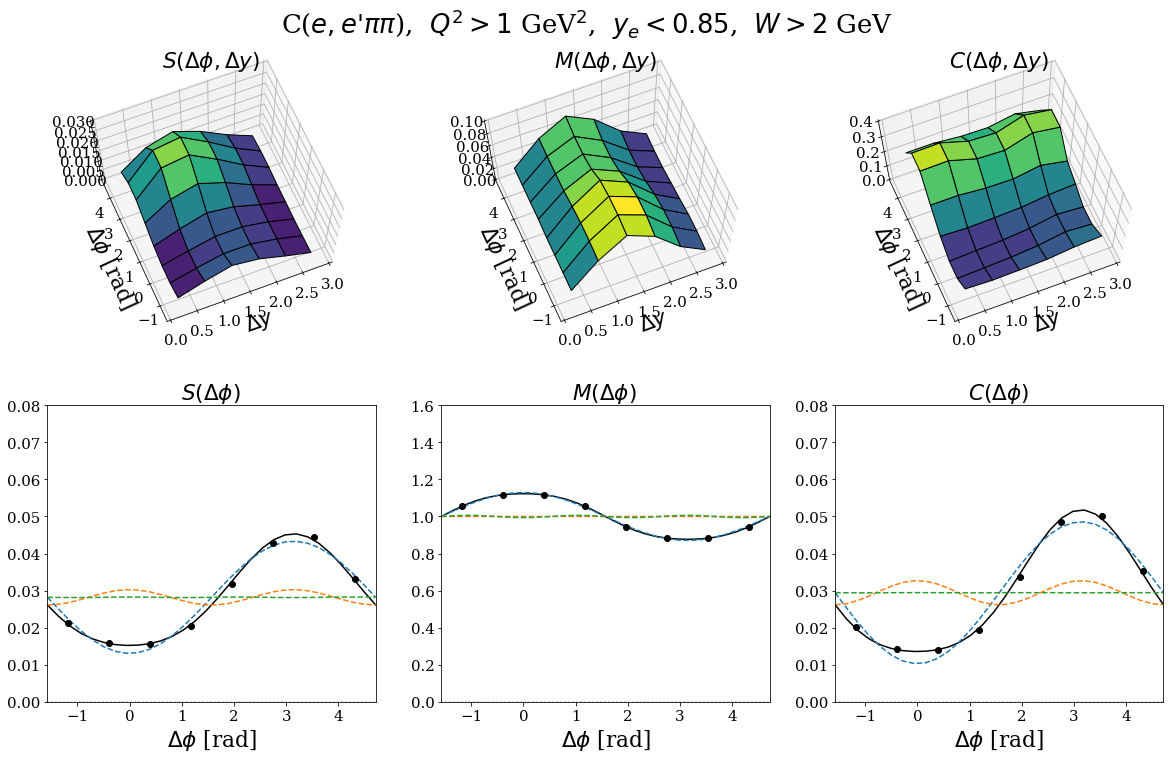

True
efficiency: [[0.6154527  0.53867268 0.53867268 0.6154527  0.60165429 0.61209645
  0.61209645 0.60165429]
 [0.6050776  0.57563963 0.57563963 0.6050776  0.61009    0.62431703
  0.62431703 0.61009   ]
 [0.60139625 0.56480803 0.56480803 0.60139625 0.61534955 0.62388185
  0.62388185 0.61534955]
 [0.57884316 0.58659867 0.58659867 0.57884316 0.59759396 0.61510356
  0.61510356 0.59759396]
 [0.56490626 0.57948582 0.57948582 0.56490626 0.57243083 0.60403667
  0.60403667 0.57243083]
 [0.56029755 0.57239927 0.57239927 0.56029755 0.56305727 0.5839959
  0.5839959  0.56305727]]
i= 1


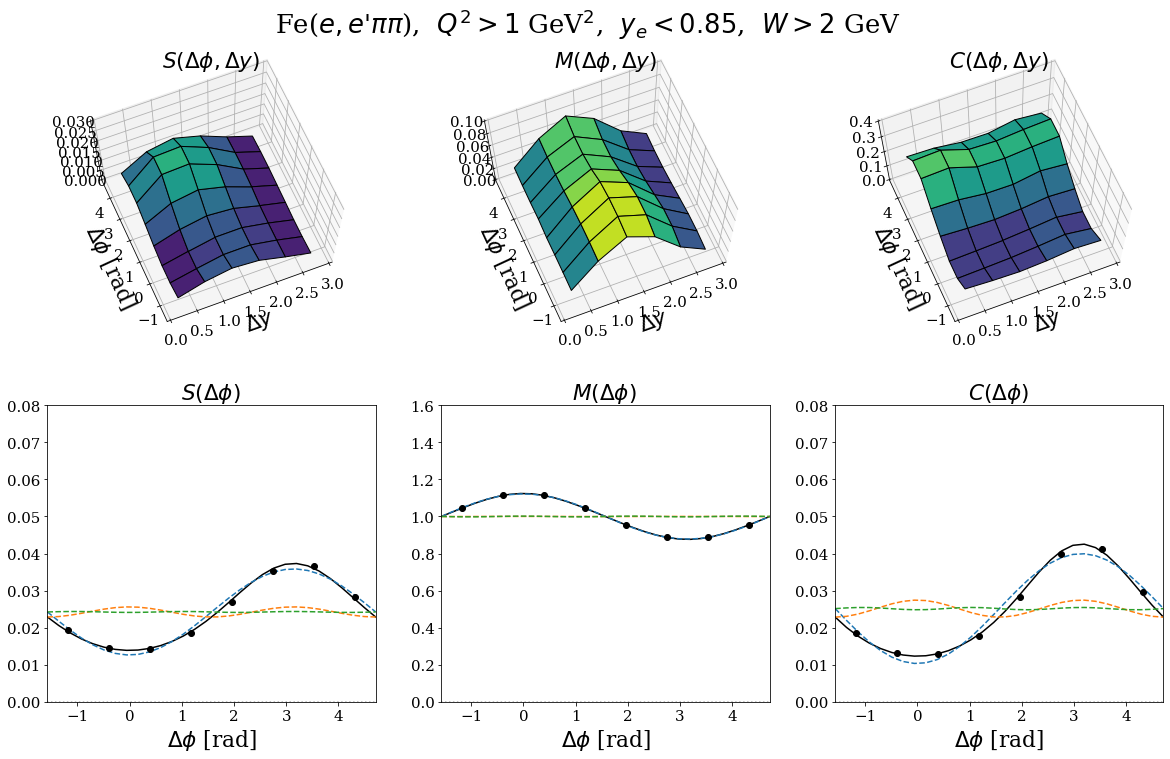

True
efficiency: [[0.59187536 0.55449752 0.55449752 0.59187536 0.59990566 0.6085816
  0.6085816  0.59990566]
 [0.59229992 0.56482522 0.56482522 0.59229992 0.61149484 0.62698416
  0.62698416 0.61149484]
 [0.59482856 0.57259985 0.57259985 0.59482856 0.60559575 0.62612087
  0.62612087 0.60559575]
 [0.58023861 0.56873468 0.56873468 0.58023861 0.58999338 0.60736613
  0.60736613 0.58999338]
 [0.58900992 0.54430454 0.54430454 0.58900992 0.57802172 0.60525436
  0.60525436 0.57802172]
 [0.56197905 0.51080802 0.51080802 0.56197905 0.57371128 0.58565849
  0.58565849 0.57371128]]
i= 1


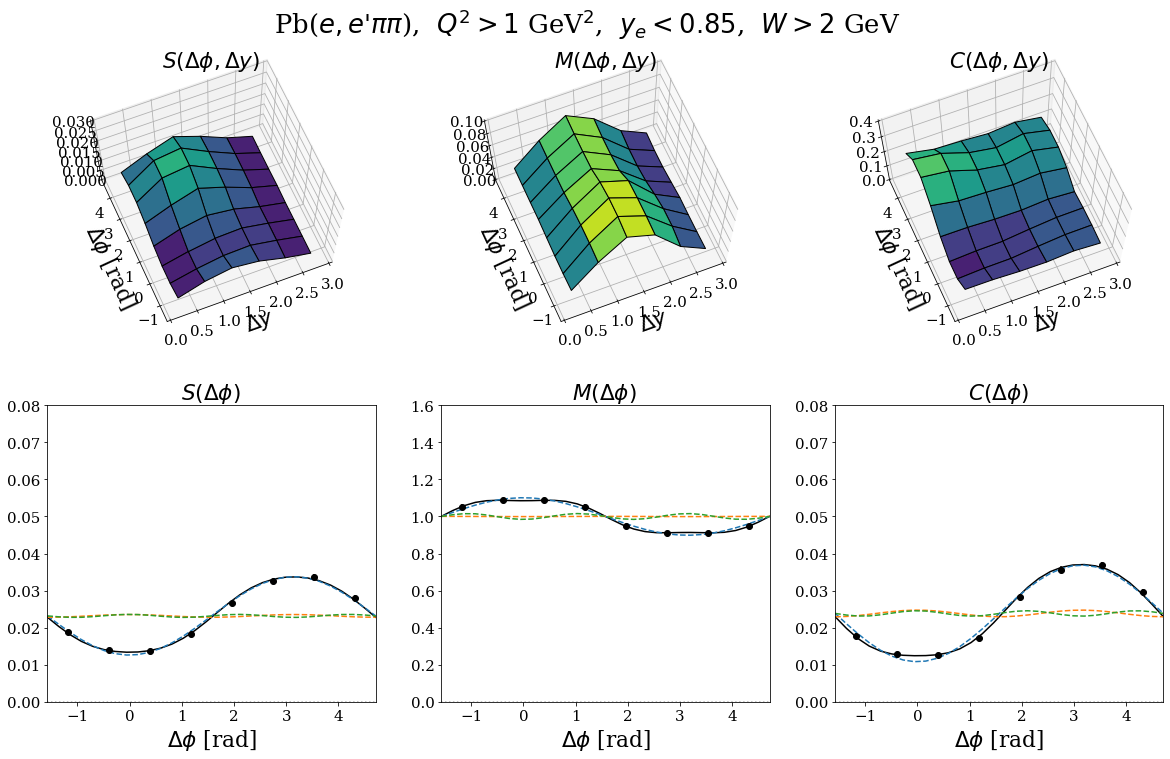

True
efficiency: [[0.59184448 0.54729326 0.54729326 0.59184448 0.60652418 0.6101423
  0.6101423  0.60652418]
 [0.59882964 0.56309338 0.56309338 0.59882964 0.61318732 0.63001888
  0.63001888 0.61318732]
 [0.58734363 0.55054631 0.55054631 0.58734363 0.60930935 0.62431835
  0.62431835 0.60930935]
 [0.56992138 0.56277408 0.56277408 0.56992138 0.58185269 0.59978759
  0.59978759 0.58185269]
 [0.54739233 0.53956488 0.53956488 0.54739233 0.55450679 0.58486006
  0.58486006 0.55450679]
 [0.52801381 0.53221357 0.53221357 0.52801381 0.52903349 0.56113193
  0.56113193 0.52903349]]
i= 1


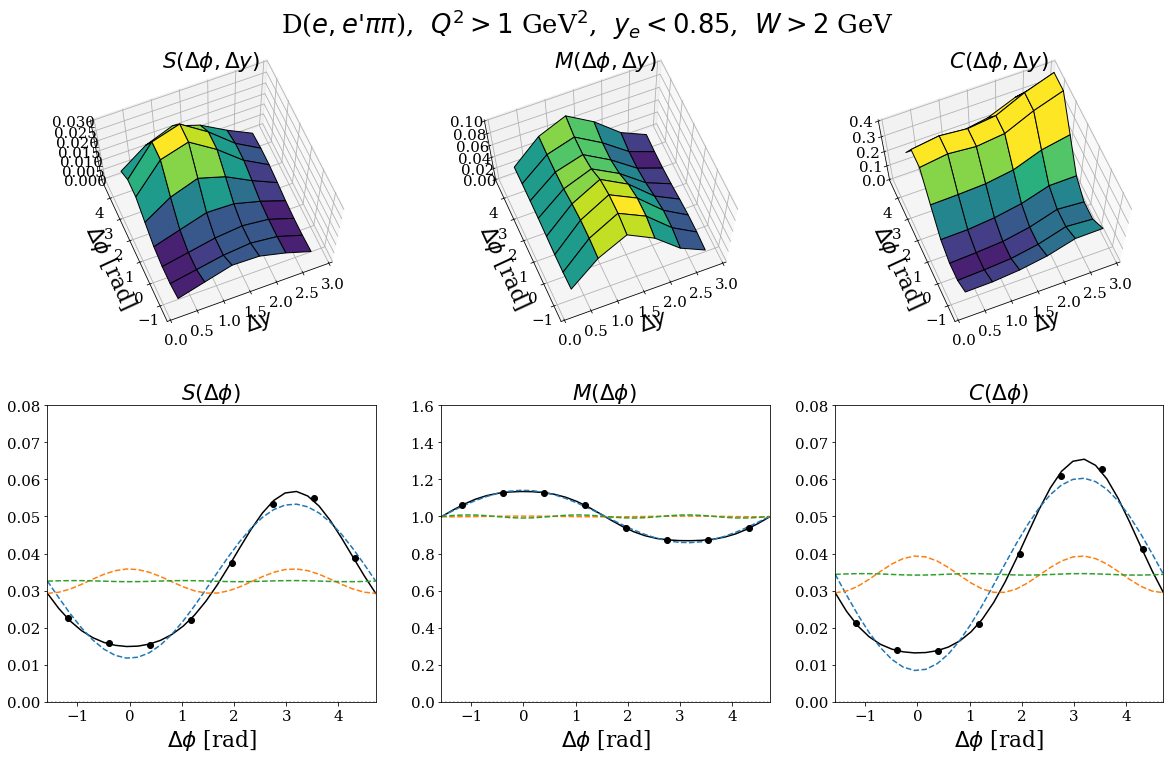

False
i= 1


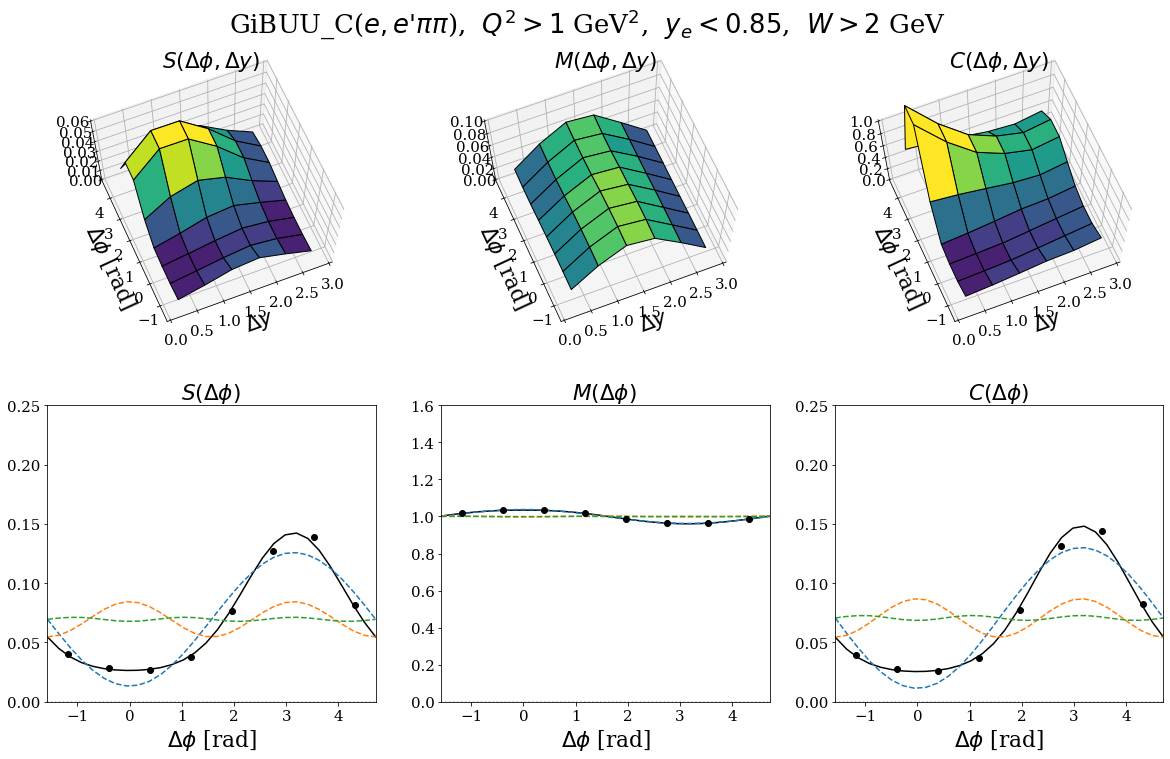

False
i= 1


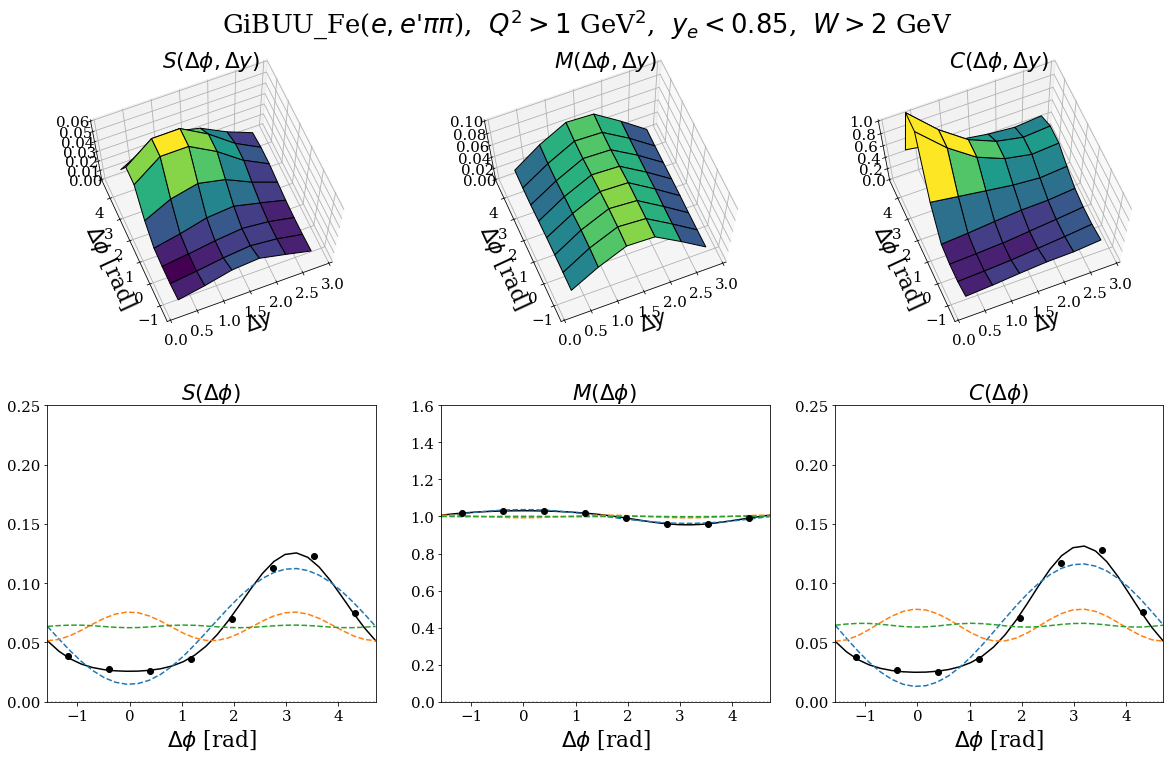

False
i= 1


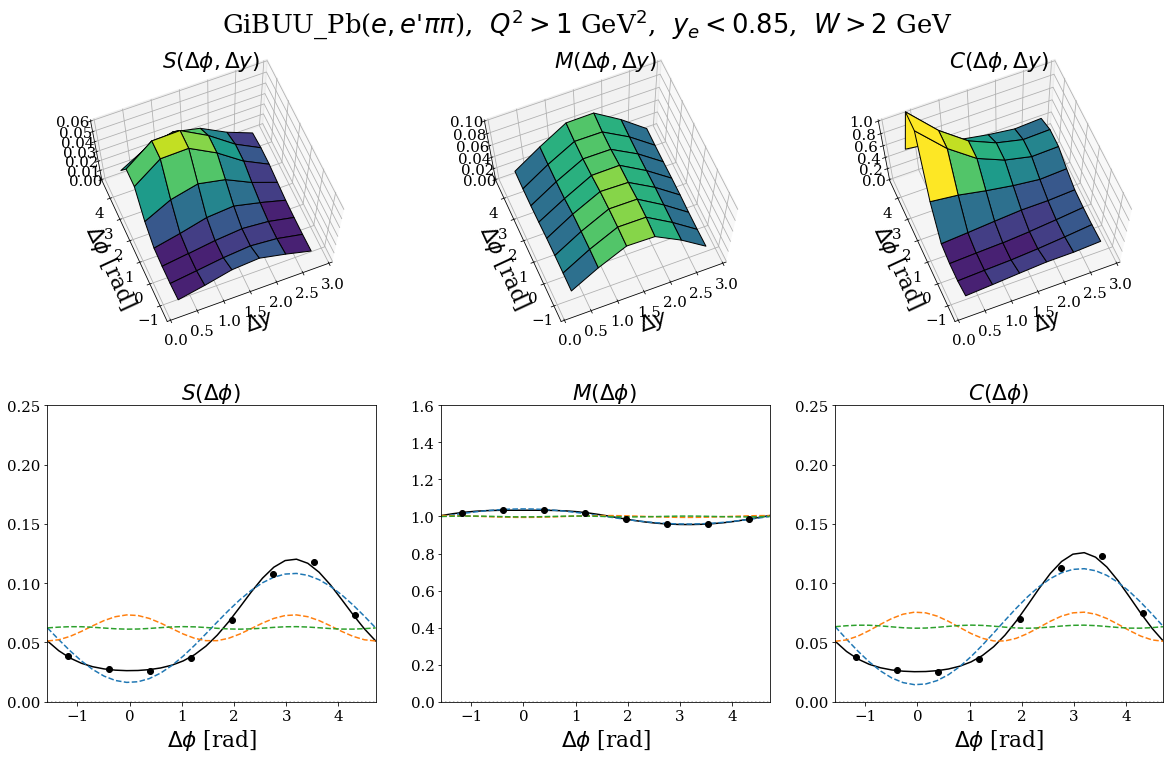

False
i= 1


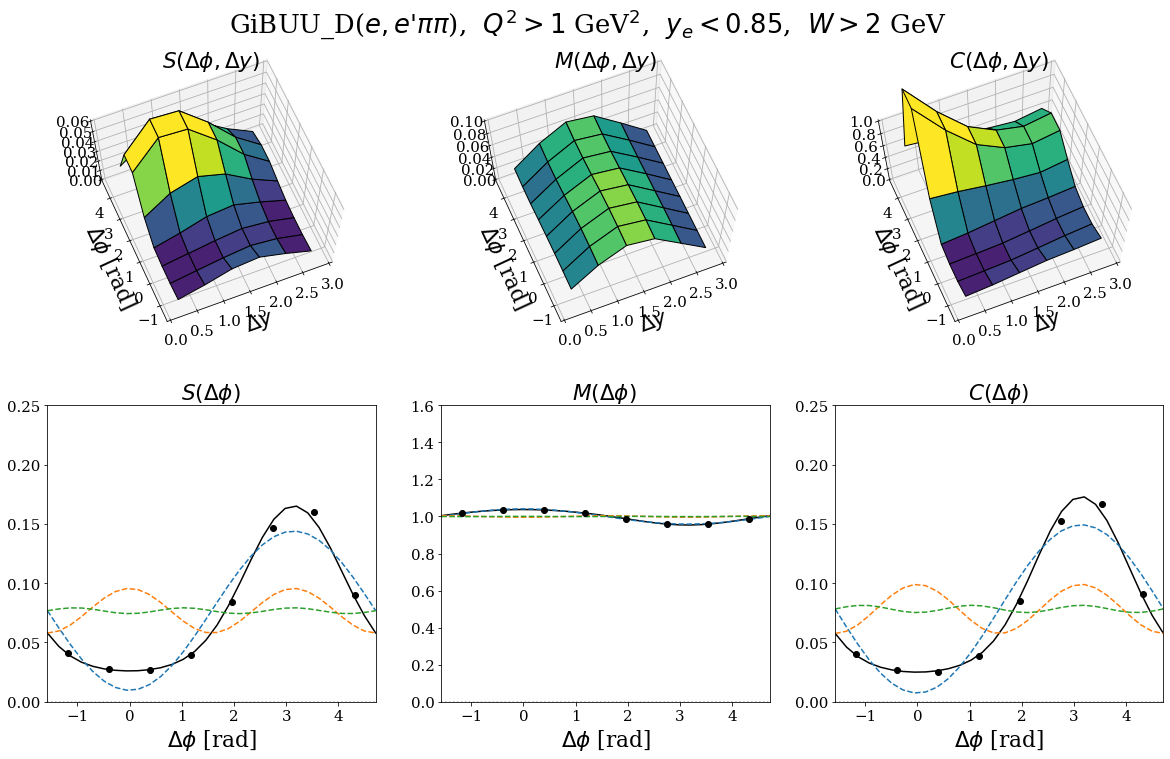

In [54]:
query = "h2_z>0.05 and h1_cm_pt**2>0.005 and h2_cm_pt**2>0.005"
labels = {'_2pi': '$\\pi\\pi$', '_pi_p':'$\\pi p$'}
for topo in '_2pi'.split():
    for a in 'C Fe Pb D GiBUU_C GiBUU_Fe GiBUU_Pb GiBUU_D'.split():
        data = dfs_data[a+topo].query(query)
        mixed = dfs_mixed[a+topo].query(query)
        triggers = dfs_trigger[a]
        mc = dfs_mc[a+topo]if a+topo in dfs_mc.keys() else None
        print(mc is not None)
        if topo == '_2pi':
            #zlims = ((0,0.015),(0,0.15),(0,0.15))
            #ylims = ((0,0.03),(0,1.6),(0,0.03))
            zlims = ((0,0.03),(0,0.1),(0,0.4))
            ylims = ((0,0.08),(0,1.6),(0,0.08))
            if "GiBUU" in a:
                zlims = ((0,0.06),(0,0.1),(0,1.0))
                ylims = ((0,0.2),(0,1.6),(0,0.25))
        else :
            #zlims = ((0,0.03),(0,0.15),(0,1))
            #ylims = ((0,0.05),(0,1.6),(0,0.05))
            zlims = ((0,0.04),(0,0.15),(0,1.7))
            ylims = ((0,0.1),(0,1.6),(0,0.1))
        fig,axs = dphi_deta_plot_3_proj(data,mixed,df_triggers=triggers,
                      deta_range=yrange_dfdy,projyrange=yrange_dfdy,bins=bins_dfdy,bins1d=8,
                      text=a + "($e,e$'"+ labels[topo]+")\n$Q^2>1$ GeV$^2$\n$y_e<0.85$\n$W>2$ GeV",
                        zlims=zlims,ylims=ylims,df_mc=mc)
        #axs[4].errorbar(*pi_p_M_from_mc,color='g',marker='o') 
        #axs[4].text(-0.5,0.027,"correction from event mixing",fontsize=18,color='k')
        #axs[4].text(-0.5,0.01,"alt. correction from MC",fontsize=18,color='g') 
        plt.savefig(image_dir + "/smc_EG2_%s%s.pdf" %(a,topo),bbox_inches='tight')
        plt.show()
        gc.collect()

In [19]:
#define function for the 2d summary plots
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import curve_fit
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)
bwr = cm.get_cmap('bwr', 20)
seismic = cm.get_cmap('seismic', 30)



def offset(a, amount=np.pi/2):
    return a+2*np.pi*(a<-np.pi+amount)-2*np.pi*(a>=np.pi+amount)

def summary_plot(df,df_mixed,df_triggers=None,bins=(6,4),projyrange=(0,2.5), bins1d=14, text="", plotFourier=3,ylimrat=(0,0.02),
                include_1d=True,zlims=None,zlimrat=None,
            surfrat = True, bottomRowOnly=False, topRowOnly=False,logzrat=False,useMixedInR2h=False, reflect=True,
       outputTableFileTemplate=None,sys_err_corr=None,sys_err_rat=None,
                df_mc=None):
    deta_range=projyrange
    allCorrs = []
    allRats = []
    alldCorrs = []
    alldRats = []
    import matplotlib.colors as colors
    #elevation and azimuth for surface plots
    elev = 70
    azim = -112.5#-135
    
    
    if include_1d:
        fig = plt.figure(figsize=(20,8))
        ax_r1 = fig.add_subplot(gs[0,5])
        ax_r2 = fig.add_subplot(gs[1,5],sharex = ax_r1)
        ax_r1.tick_params(axis='x',direction='inout',bottom=True)
        ax_r2.tick_params(axis='x',direction='inout',top=True)
        gs = fig.add_gridspec(ncols=6, nrows=2, width_ratios=[1,1,1,1,0.5,1])
    else:
        if not bottomRowOnly and not topRowOnly:
            
            fig = plt.figure(figsize=(16.6,8))
            gs = fig.add_gridspec(ncols=5, nrows=2, width_ratios=[1,1,1,1,0.15])
        elif topRowOnly:
            fig = plt.figure(figsize=(16,4))
            gs = fig.add_gridspec(ncols=5, nrows=1, width_ratios=[1,1,1,1,0.15])
        elif bottomRowOnly:
            fig = plt.figure(figsize=(12,4))
            gs = fig.add_gridspec(ncols=4, nrows=1, width_ratios=[1,1,1,0.15])
    
    axt_d = None
    axb_c = None
    
    yc_d = None
    dyc_d = None
    
    hists_2d = []
    dhists_2d = []
    
    for i in range(7):
        dphi_range = (-np.pi/2,3*np.pi/2)
        

        if df_triggers is None:
            denom = len(df[i])*2*np.pi/bins[0]*(deta_range[1]-deta_range[0])/bins[1]
        else:
            denom = len(df_triggers[i])*2*np.pi/bins[0]*(deta_range[1]-deta_range[0])/bins[1]

        #hist1,xedges, yedges = np.histogram2d([2,2,2,2],[0,0,0,0], bins=bins,range=[deta_range, dphi_range])
        
        def hist(df):
            ret = np.histogram2d(df.drap, abs(df.dphi), bins=bins, range=[deta_range, dphi_range])
            if not reflect:
                return ret
            else :
                tmp = np.divide(np.add(ret[0],np.histogram2d(df.drap, offset(-abs(df.dphi)), bins=bins, range=[deta_range, dphi_range])[0]),2)
                return (tmp, ret[1],ret[2])
        def hist_mc(df):
            ret = np.histogram2d(df.drap_truth, abs(df.dphi_truth), bins=bins, range=[deta_range, dphi_range], weights=df.weight_truth)
            if not reflect:
                return ret
            else :
                tmp = np.divide(np.add(ret[0],np.histogram2d(df.drap_truth, offset(-abs(df.dphi_truth)), bins=bins, range=[deta_range, dphi_range], weights=df.weight_truth)[0]),2)
                return (tmp, ret[1],ret[2])   
        
        #hist1, xedges, yedges = np.histogram2d(df[i].diff_rap_cm, abs(df[i].diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
        hist1, xedges, yedges = hist(df[i])
        dh1 = np.sqrt(hist1)
        hist1 = np.divide(hist1, denom)
        dh1 = np.divide(dh1, denom)


        #print(xedges)
        hist2, xedges, yedges = hist(df_mixed[i])
        dh2 = np.sqrt(hist2)

        hist2 = np.divide(hist2,len(df_mixed[i])*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
        dh2 = np.divide(dh2,len(df_mixed[i])*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
        
        hist3 = np.divide(hist1,hist2)
        dh3 = hist3*np.hypot(dh1/hist1,dh2/hist2)
        
        if df_mc is not None:
            eff = hist_mc(df_mc[i].query("h2_z>0"))[0]/hist_mc(df_mc[i])[0]
            print(eff)
            hist3 = hist3/eff
            dh3 = dh3/eff
            
        if useMixedInR2h:
            hists_2d.append(hist3)
            dhists_2d.append(dh3)
        else :
            hists_2d.append(hist1)
            dhists_2d.append(dh1)
        allCorrs.append(hist3)
        alldCorrs.append(dh3)    
        xpos, ypos = np.meshgrid(np.add(xedges[:-1],xedges[1:])/2, np.add(yedges[:-1],yedges[1:])/2)
        zpos = 0
        #help(hist1.transpose)

        for j in range(len(xedges)-1):
            if(xedges[j]>projyrange[0]):
                break
        #print("i=",i)
        def plot2d(ax, hist,xpos, ypos, cm = viridis,vmin=None,vmax=None, surf = True,log=False):
            if surf:
                #print("xpos",xpos)
                #print("ypos",ypos)
                #print("hist",hist)
                hist = hist.transpose()
                if not log:
                    return ax.plot_surface(xpos, ypos, hist, cmap=cm,edgecolor='k',vmin=vmin,vmax=vmax)
                else :
                    def log_tick_formatter(val, pos=None):
                        return f"$10^{{{int(val)}}}$"
                        #return "%.1f"%10**val
                    
                    ret = ax.plot_surface(xpos, ypos, np.log10(hist), cmap=cm,edgecolor='k',vmin=np.log10(vmin),vmax=np.log10(vmax))
                    ax.set_zlim(np.log10(vmin),np.log10(vmax))
                    ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
                    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))
                    return ret;
            
            else:
                return ax.pcolor(xpos,ypos,hist, cmap=cm,vmin=vmin,vmax=vmax, norm=colors.LogNorm(vmin=vmin, vmax=vmax) if log else None)
        if i<=3:
            if bottomRowOnly:
                continue
            ax1 = fig.add_subplot(gs[0,i], projection='3d', sharez = axt_d)
            ax1.set_title('D C Fe Pb'.split()[i],fontsize='xx-large')
            if i == 0:
                axt_d = ax1

            
            ax1.view_init(azim=azim,elev = elev)
            ax1.set_xlabel("$\\Delta y$",fontsize='large')
            ax1.set_ylabel("$\\Delta\\phi$ [rad]",fontsize='large')
            ax1.set_zlabel("             $C(\\Delta\\phi,\\Delta y)$\n",fontsize='large',linespacing=3.2)
            ax1.zaxis.set_rotate_label(False)
            if not zlims is None:
                ax1.set_zlim(*zlims)
            
            p2d = plot2d(ax1,hist3,xpos,ypos, vmin=zlims[0] if not zlims is None else None, vmax=zlims[1] if not zlims is None else None)
            if i == 3:
                fig.colorbar(p2d, orientation='vertical',cax=fig.add_subplot(gs[0,-1]))
        if i >= 4 :
            if topRowOnly:
                break
            #use surface plot for the ratio?
            if surfrat:
                ax = fig.add_subplot(gs[-1,i-3-int(bottomRowOnly)], projection='3d', sharez = axb_c)
                ax.view_init(azim=azim,elev = elev)
                ax.zaxis.set_rotate_label(False)
                if not zlimrat is None:
                    
                    ax.set_zlim(*zlimrat)
                    #if logzrat:
                    #    ax.set_zscale('log')
            else :
                ax = fig.add_subplot(gs[-1,i-3-int(bottomRowOnly)])
            if i == 4:
                axb_c = ax
        
            #surf = ax3.plot_surface(xpos, ypos, hist3.transpose(), cmap=viridis,edgecolor='k')
            if useMixedInR2h:
                h = np.divide(hists_2d[i-3],hist3)
                dh = h*np.hypot(dhists_2d[i-3]/hists_2d[i-3], dh3/hist3)
            else:
                h = np.divide(hists_2d[i-3],hist1)
                dh = h*np.hypot(dhists_2d[i-3]/hists_2d[i-3], dh1/hist1)
            allRats.append(h)
            alldRats.append(dh)
            p2d = plot2d(ax,h,xpos,ypos,cm=seismic,vmin=zlimrat[0] if not zlimrat is None else None,vmax=zlimrat[1] if not zlimrat is None else None, surf=surfrat,log=logzrat)
            if i == 6:
                def log_tick_formatter(val, pos=None):
                    return f"$10^{{{int(val)}}}$"
                cax = fig.add_subplot(gs[-1,-1])
                
                cbar = fig.colorbar(p2d, orientation='vertical',cax=cax)
                if logzrat:
                    cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
                    cbar.ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
            ax.set_xlabel("$\\Delta y$",fontsize='large')
            ax.set_ylabel("$\\Delta\\phi$ [rad]",fontsize='large')
            a = "D C Fe Pb".split()[i-3]
            #ax.set_title(f"$\\frac{{C_{{\\mathrm{{{a}}}}}(\\Delta\\phi,\\Delta y)}}{{C_D(\\Delta\\phi,\\Delta y)}}$", fontsize='x-large')
            ax.set_title(a, fontsize='x-large')
            ax.set_zlabel("    $R_{2h}$\n",fontsize='large',linespacing=4)
            #ax.set_title("$C(\\Delta\\phi,\\Delta y)$",rotation=0)
            ax.set_xlim(*deta_range)
            ax.set_ylim(*dphi_range)
            
            
        
        
    fig.subplots_adjust(wspace=0)
    
       
    if text and not topRowOnly and not bottomRowOnly:
        fig.text(0.15,0.25,text,bbox=dict(facecolor='white', alpha=1),fontsize='large')
    
    #now generate the table:
    tableTxt = "$|\\Delta\phi|$ range & $\Delta y$ range & D & C & Fe& Pb \\\\\n\\hline\n"
    for i in range(bins[1]//2):
        for j in range(bins[0]):

            if j == 0:
                rngstr = f"{2*i*np.pi/bins[1]:.2f}$-${2*(i+1)*np.pi/bins[1]:.2f} & {projyrange[0]+j*(projyrange[1]-projyrange[0])/bins[0]:.1f}$-${projyrange[0]+(j+1)*(projyrange[1]-projyrange[0])/bins[0]:.1f} "
            else:
                rngstr = f"  & {projyrange[0]+j*(projyrange[1]-projyrange[0])/bins[0]:.1f}$-${projyrange[0]+(j+1)*(projyrange[1]-projyrange[0])/bins[0]:.1f} "
            tableTxt+=rngstr
            for k in range(4):
                val = allCorrs[k][j][i+bins[1]//4]
                sys =allCorrs[k][j][i+bins[1]//4]*sys_err_corr[j][i] if sys_err_corr is not None else 0
                stat = alldCorrs[k][j][i+bins[1]//4]
                tableTxt+=f"& {val:.3f}$\\pm${stat:.3f}$\\pm${sys:.3f} "
            tableTxt+="\\\\\n"
        if i == bins[1]//2-1 and j== bins[0]-1:
            tableTxt+="\\hline\\hline\n"
        else :
            tableTxt+="\\hline\n"
    tableTxt=tableTxt[:-1] #remove trailing "\n"
    if outputTableFileTemplate is not None:
        f=open(outputTableFileTemplate%"_corr", 'w')
        f.write(tableTxt)
        f.close()
    
    tableTxt = "$|\\Delta\phi|$ range & $\Delta y$ range & C & Fe& Pb \\\\\n\\hline\n"
    for i in range(bins[1]//2):
        for j in range(bins[0]):
            
            if j == 0:
                rngstr = f"{2*i*np.pi/bins[1]:.2f}$-${2*(i+1)*np.pi/bins[1]:.2f} & {projyrange[0]+j*(projyrange[1]-projyrange[0])/bins[0]:.1f}$-${projyrange[0]+(j+1)*(projyrange[1]-projyrange[0])/bins[0]:.1f} "
            else:
                rngstr = f"  & {projyrange[0]+j*(projyrange[1]-projyrange[0])/bins[0]:.1f}$-${projyrange[0]+(j+1)*(projyrange[1]-projyrange[0])/bins[0]:.1f} "
            tableTxt+=rngstr
            for k in range(3):
                val = allRats[k][j][i+bins[1]//4]
                sys =allRats[k][j][i+bins[1]//4]*sys_err_rat[j][i] if sys_err_rat is not None else 0
                stat = alldCorrs[k][j][i+bins[1]//4]
                tableTxt+=f"& {val:.3f}$\\pm${stat:.3f}$\\pm${sys:.3f} "
                
                tableTxt+=f"& {allRats[k][j][i+bins[1]//4]:.2f}$\\pm${alldRats[k][j][i+bins[1]//4]:.2f}$\\pm$0.00 "
            tableTxt+="\\\\\n"
        if i == bins[1]//2-1 and j== bins[0]-1:
            tableTxt+="\\hline\\hline\n"
        else :
            tableTxt+="\\hline\n"
    if outputTableFileTemplate is not None:
        f=open(outputTableFileTemplate%"_R2h", 'w')
        f.write(tableTxt)
        f.close()



[[0.59184448 0.54729326 0.54729326 0.59184448 0.60652418 0.6101423
  0.6101423  0.60652418]
 [0.59882964 0.56309338 0.56309338 0.59882964 0.61318732 0.63001888
  0.63001888 0.61318732]
 [0.58734363 0.55054631 0.55054631 0.58734363 0.60930935 0.62431835
  0.62431835 0.60930935]
 [0.56992138 0.56277408 0.56277408 0.56992138 0.58185269 0.59978759
  0.59978759 0.58185269]
 [0.54739233 0.53956488 0.53956488 0.54739233 0.55450679 0.58486006
  0.58486006 0.55450679]
 [0.52801381 0.53221357 0.53221357 0.52801381 0.52903349 0.56113193
  0.56113193 0.52903349]]
[[0.59255038 0.53870349 0.53870349 0.59255038 0.5995589  0.60994632
  0.60994632 0.5995589 ]
 [0.60117458 0.55713983 0.55713983 0.60117458 0.6110786  0.61874081
  0.61874081 0.6110786 ]
 [0.60249762 0.55557922 0.55557922 0.60249762 0.60661806 0.62615582
  0.62615582 0.60661806]
 [0.58164853 0.57707504 0.57707504 0.58164853 0.59606001 0.61436089
  0.61436089 0.59606001]
 [0.57524174 0.56829055 0.56829055 0.57524174 0.57724988 0.59032627
  

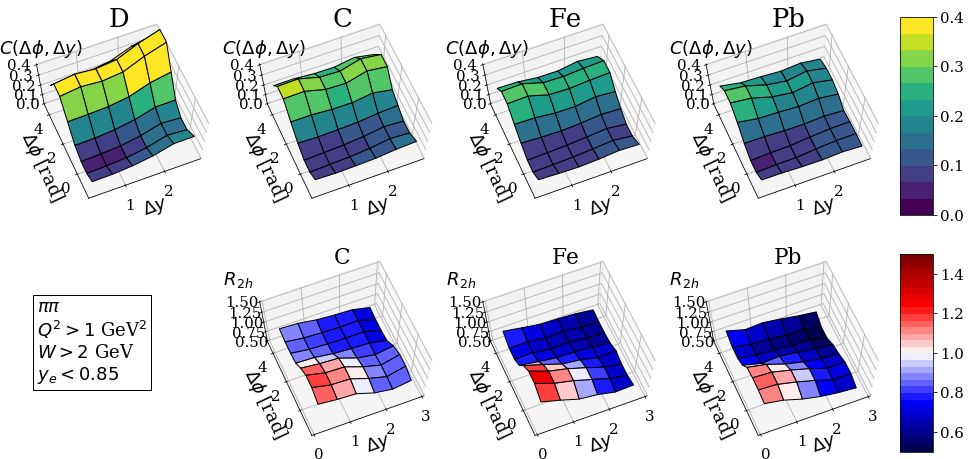

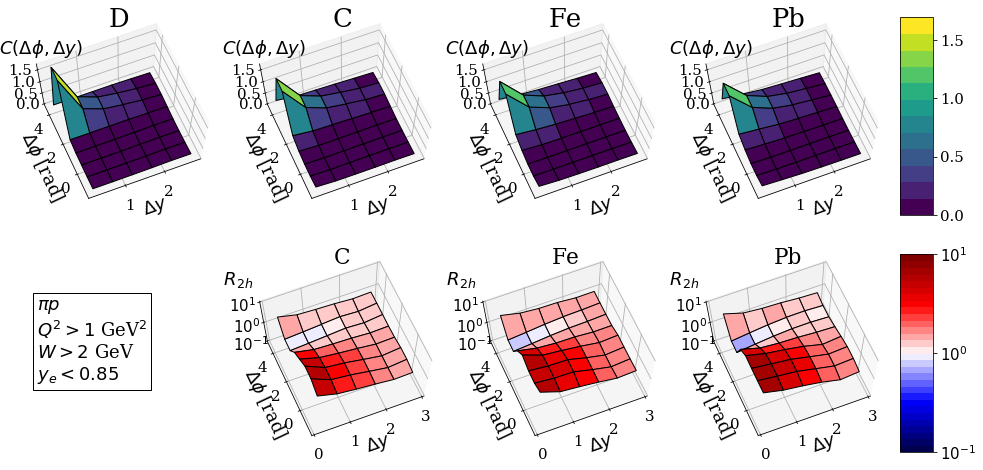

In [157]:

targets = 'D C Fe Pb D_C D_Fe D_Pb'.split()
targets2 = 'D C Fe Pb D D D'.split()
q = 'h2_z>0.05 and h1_z>0.5 and h1_cm_pt**2>0.005 and h2_cm_pt**2>0.005'

sys_err_corr_2pi = None
sys_err_corr_pi_p = None
sys_err_rat_2pi = None
sys_err_rat_pi_p = None

summary_plot([dfs_data[a + '_2pi'].query(q) for a in targets],
                                [dfs_mixed[a + '_2pi'].query(q) for a in targets],
                                [dfs_trigger[a] for a in targets], bins=bins_dfdy, projyrange=yrange_dfdy,
                                text="$\\pi\\pi$\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$y_e<0.85$",
                                zlims=(0,0.4),zlimrat=(0.5,1.5),include_1d=False,
                                outputTableFileTemplate=image_dir + "/summary_2d_2pi%s.tex",
            sys_err_corr=sys_err_corr_2pi, sys_err_rat=sys_err_rat_2pi,
            df_mc = [dfs_mc[a+'_2pi'] for a in targets2])
plt.savefig(image_dir + "/summary_2d_2pi.pdf",bbox_inches='tight')

# corr_plots_nuclear.summary_plot([dfs_data[a + '_2pi'].query(q) for a in targets],
#                                 [dfs_mixed[a + '_2pi'].query(q) for a in targets],
#                                 [dfs_trigger[a] for a in targets], bins=bins,projyrange=projyrange ,
#                                 text="$\\pi\\pi$\n$Q^2>1$ GeV$^2$\n$y_e<0.85$\n$W>2$ GeV",
#                                 zlims=(0,0.15),zlimrat=(0.5,1.5),include_1d=False,bottomRowOnly=True)
# plt.savefig(image_dir + "/summary_2d_2pi_bottom.pdf",bbox_inches='tight')


summary_plot([dfs_data[a + '_pi_p'].query(q) for a in targets],
                                [dfs_mixed[a + '_pi_p'].query(q) for a in targets],
                                [dfs_trigger[a] for a in targets],projyrange=yrange_dfdy,bins=bins_dfdy,ylimrat=(0,.1), 
                                zlims=(0,1.7),text="$\\pi p$\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$y_e<0.85$",
                                zlimrat=(.1,10),include_1d=False,logzrat=True,
                                outputTableFileTemplate=image_dir + "/summary_2d_pi_p%s.tex",
            sys_err_corr=sys_err_corr_pi_p, sys_err_rat=sys_err_rat_pi_p)
plt.savefig(image_dir + "/summary_2d_pi_p.pdf",bbox_inches='tight')

# corr_plots_nuclear.summary_plot([dfs_data[a + '_pi_p'].query(q) for a in targets],
#                                 [dfs_mixed[a + '_pi_p'].query(q) for a in targets],
#                                 [dfs_trigger[a] for a in targets],projyrange=projyrange,bins=bins,ylimrat=(0,.1), 
#                                 zlims=(0,1),text="$\\pi p$\n$Q^2>1$ GeV$^2$\n$y_e<0.85$\n$W>2$ GeV",
#                                 zlimrat=(.1,10),include_1d=False,bottomRowOnly=True,logzrat=True,surfrat=True)
# plt.savefig(image_dir + "/summary_2d_pi_p_bottom.pdf",bbox_inches='tight')

In [158]:
def plot_hypot(df_A,df_D,df_triggers_A=None,df_triggers_D=None,
                              fig=None,bins=10,
              df_mix_A=None,df_mix_D=None,color=None,label=None,linestyleFit='-',fillstyle='full',
                   marker='o',markersize=7,shift=0, dr2=True,maxval=16,
              sys_err=None):
    hypotstr ="sqrt(diff_phi_cm**2+diff_rap_cm**2)" if not dr2 else 'diff_phi_cm**2+diff_rap_cm**2'
    
    #now for 1d projections:
    
    if df_triggers_A is None:
        denom = len(df_A)*2*np.pi/bins
    else:
        denom = len(df_triggers_A)*2*np.pi/bins
    y, x = np.histogram(df_A.eval(hypotstr), bins=bins, range=(0,maxval))
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,denom)
    dy=np.divide(dy,denom)
    
    if not df_mix_A is None:
        y_mix,_ = np.histogram(df_mix_A.eval(hypotstr), bins=bins, range=(0,maxval))
        y_mix = np.divide(y_mix,len(df_mix_A)/bins)
        y = y/y_mix
        dy = dy/y_mix
    if df_D is None:
        plt.errorbar(x+shift,y,dy,marker='o',color=color,linestyle='',label=label,fillstyle=fillstyle)
        return
        
        
    if df_triggers_D is None:
        denom = len(df_D)*2*np.pi/bins
    else :
        denom = len(df_triggers_D)*2*np.pi/bins
    yd, _ = np.histogram(df_D.eval(hypotstr), bins=bins, range=(0,maxval))
    dyd = np.sqrt(yd)
    yd=np.divide(yd,denom)
    dyd=np.divide(dyd,denom)
    
    
    if not df_mix_D is None:
        y_mix,_ = np.histogram(df_mix_D.eval(hypotstr), bins=bins, range=(0,maxval))
        y_mix = np.divide(y_mix,len(df_mix_D)/bins)
        yd = yd/y_mix
    
    
    dyc = y/yd*np.hypot(dy/y, dyd/yd)
    yc= y/yd
    
    plt.errorbar(x+shift,yc,dyc,marker='o',color=color,linestyle='',
                 label=label,fillstyle=fillstyle,capsize=3)
    if sys_err is not None:
        plt.errorbar(x+shift,yc,np.hypot(dyc,sys_err*yc),marker=None, color=color,
                     linestyle='')
    print(label, yc, dyc)

In [159]:
#currently just the systematic error from the particle id
sys_err = {'_2pi': [2.7977044476327118,1.017620543641579,0.4540451293340671,
                                0.5223269151986891, 0.679078284755074, 1.1021876437863387,
                                1.8024545989764957,2.73172569706104,3.415900918897323,
                                4.810272134917593],
                     '_pi_p': [0.9191176470588236,0.5436971405557792,0.5837711617046117,
                                0.6932282545242265,0.8955288607485146,1.1748141993260397,
                                4.93765716680637,7.306914197310483,7.318967190836731,
                                7.722694054908157]}


UndefinedVariableError: name 'diff_phi_cm' is not defined

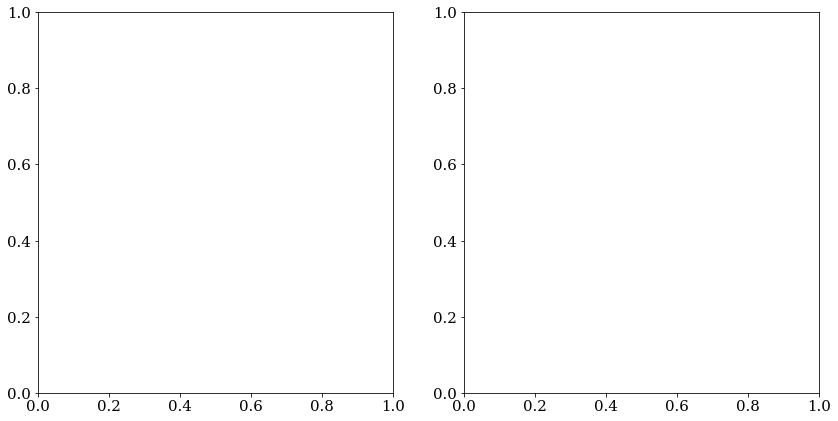

In [160]:
useMix=False

maxval=15
bins_R=10

fig,axs = plt.subplots(1,2,figsize=(14,7),sharex='all')
for ax,label,topo,fillstyle,linestyleFit in zip(axs,'$\\pi\\pi$ $\\pi{}p$'.split(), 
                                                '_2pi _pi_p'.split(),'full full'.split(), '- -'.split()):
    plt.sca(ax)
    query = f"h2_z>0.05 and h1_z>0.5"
    for j,(a,col) in enumerate(zip('C Fe Pb'.split(),
                        "tab:blue tab:orange tab:green".split())):
        
        linestyleFit='-' if a == 'D' else '--'
        A = dfs_data[a+topo].query(query)
        triggers_A = dfs_trigger[a].query('h1_z>0.5')
        mix_A = dfs_mixed[a+topo].query(query) 

        if a != 'D':
            D = dfs_data['D_'+a+topo].query(query)
            triggers_D = dfs_trigger['D_'+a].query('h1_z>0.5')
            mix_D = dfs_mixed['D_'+a+topo].query(query) 
        
        shift = j*.1
        
        #nuclear
        if a != 'D':
            plot_hypot(A,D,df_triggers_A=triggers_A,df_triggers_D=triggers_D,
                      bins=bins_R, df_mix_A=mix_A if useMix else None,df_mix_D=mix_D if useMix else None,color=col,label=a,
                                       fillstyle=fillstyle,linestyleFit=linestyleFit,
                       sys_err=pd.Series(sys_err[topo])/100.,
                       shift=shift,maxval=maxval)
        plt.gca().set_xlim(0,maxval)

    ax.set_xlabel("$\\Delta R^2 = \\Delta\\phi^2+\\Delta y^2$")
    
    ax.set_ylabel("$R_{2h}$")
    ax.axhline(1,color='0.7', linestyle='--')
   
    ax.set_ylim(0)

    ax.set_title(label+ " pairs")
axs[0].text(.6,0.8, "1<$Q^2$<4 GeV$^2$\n$2<W<3$ GeV\n$y_e$<0.85",transform=axs[0].transAxes)
axs[1].legend(framealpha=0)
plt.savefig(image_dir+f"/hypot_1d_both.pdf",bbox_inches='tight')
plt.show()

# $R_{2h}$ and $C$ slice plots

In [90]:
def plot1d(df_A,df_D,df_triggers_A=None,df_triggers_D=None, df_mc=None,
                              fig=None,bins=np.linspace(1.2,2.5,13),
              df_mix_A=None,df_mix_D=None,color=None,label=None,linestyleFit='-',fillstyle='full',
                   marker='o',markersize=7,shift=0, xvar='pair_mass',
              sys_err=None,band=False, query="Q2==Q2",xvar_truth=None,
          query_truth="Q2_truth=Q2_truth", scale=1, weight=True,query_trig=None,mirror=False):
    #now for 1d projections:
    #print(xvar, len(xvar))
    
    nbins = len(bins)-1
    if df_triggers_A is None:
        denom = len(df_A)*2*np.pi/nbins
    else:
        if query_trig is not None:
            df_triggers_A=df_triggers_A.query(query_trig)
        denom = len(df_triggers_A)*(bins[1]-bins[0])
    if query is not None:
        df_A= df_A.query(query)
        if df_D is not None:
            df_D= df_D.query(query)
            
    
    
    y, x = np.histogram(df_A.eval(xvar), bins=bins)
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,denom)
    dy=np.divide(dy,denom)
    
    
    if df_mc is not None:
        eff = np.histogram(df_mc.query(query_truth).query("h2_z>0").eval(xvar_truth), 
                           bins=bins, 
                           weights=df_mc.query(query_truth).query("h2_z>0").eval("weight_truth") if weight else None)[0]/\
                np.histogram(df_mc.query(query_truth).eval(xvar_truth), bins=bins, 
                             weights=df_mc.query(query_truth).eval("weight_truth") if weight else None)[0]
        y/=eff
        dy/=eff
        #print(eff)
    if not df_mix_A is None:
        y_mix,_ = np.histogram(df_mix_A.query(query).eval(xvar), bins=bins)
        dy_mix = np.sqrt(y_mix)
        s = len(df_mix_A)
        print("debug: ", len(df_mix_A)/len(bins)/(len(df_mix_A)*(bins[1]-bins[0])))
        y_mix = np.divide(y_mix,len(df_mix_A)/(len(bins)-1))
        dy = y/y_mix*np.sqrt(dy**2/y**2, dy_mix/y_mix**2)
        y = y/y_mix
    if df_D is None:
        if mirror:
            print("mirror!")
            x = pd.Series(list(x)+ list(2*np.pi-x)[::-1])
            y = pd.Series(list(y)+list(y)[::-1])
            dy = pd.Series(list(dy)+list(dy)[::-1])
        if not band:
            plt.errorbar(x+shift,np.multiply(y,scale),np.multiply(dy,scale),marker='o',color=color,linestyle='',
                         label=label,fillstyle=fillstyle,capsize=3)
            if sys_err is not None:
                plt.errorbar(x+shift,y*scale,np.hypot(dy,sys_err*y)*scale,marker='o',
                             color=color,linestyle='',fillstyle=fillstyle)
        else:
            plt.plot(x,y*scale, marker='', linestyle='-',label=label,linewidth=4,alpha=0.5,color=color)
        return
        
        
    if df_triggers_D is None:
        denom = len(df_D)*2*np.pi/nbins
    else :
        if query_trig is not None:
            df_triggers_D=df_triggers_D.query(query_trig)
        denom = len(df_triggers_D)*(bins[1]-bins[0])
    yd, _ = np.histogram(df_D.eval(xvar), bins=bins)
    dyd = np.sqrt(yd)
    yd=np.divide(yd,denom)
    dyd=np.divide(dyd,denom)
    
    
    if not df_mix_D is None:
        y_mix,_ = np.histogram(df_mix_D.query(query).eval(xvar), bins=bins)
        y_mix = np.divide(y_mix,len(df_mix_D)/nbins)
        yd = yd/y_mix
    
    
    dyc = y/yd*np.hypot(dy/y, dyd/yd)
    yc= y/yd
    
    if not band:
        if mirror:
            x = pd.concat((x, 2*np.pi-x))
            y = pd.concat(y, y.reverse())
            dy = pd.concat(dy, dy.reverse())
        plt.errorbar(x+shift,yc,dyc,marker='o',color=color,linestyle='',
                     label=label,fillstyle=fillstyle,capsize=3)

        if sys_err is not None:
            plt.errorbar(x+shift,yc*scale,np.hypot(dyc,sys_err*yc)*scale,marker=None, color=color,
                         linestyle='')
    else :
        plt.plot(x,yc*scale, marker='', linestyle='-',label=label,linewidth=4,alpha=0.5)
    #print(label, yc, dyc)
def plot_R2h_all(xvar, vartex,bins,topo ="2pi",query=None,legend=True,query_trig=None,
              sys_err=None):
    for i,(a,col) in enumerate(zip('C Fe Pb'.split(),"tab:blue tab:orange tab:green".split())):
        plot1d(dfs_data[a+"_"+topo],dfs_data["D_"+a+"_"+topo],
               df_triggers_A=dfs_trigger[a],query_trig=query_trig,
               df_triggers_D=dfs_trigger["D_"+a],color=col, query=query,
              xvar=xvar, bins=bins,label = "This work, " + a,shift=(bins[1]-bins[0])*(i-1)/10,
              sys_err=sys_err)
        plot1d(dfs_data[f"GiBUU_{a}_{topo}"],dfs_data[f"GiBUU_D_{topo}"],
               df_triggers_A=dfs_trigger["GiBUU_"+a],query_trig=query_trig,
               df_triggers_D=dfs_trigger["GiBUU_"+"D"],color=col, query=query,
              xvar=xvar, bins=bins,label = "GiBUU, " + a,shift=(bins[1]-bins[0])*(i-1)/10,band=True,
              sys_err=sys_err)
    plt.gca().set_xlabel(vartex)
    plt.gca().set_ylabel("$R_{2h}$")
    plt.axhline(1, color='0.5',linestyle='--',alpha=0.7)
    if legend:
        plt.legend(framealpha=0,ncol=2)
    plt.gca().set_ylim(0)

def plot_S_all(xvar, vartex,bins,topo ="2pi",query="Q2==Q2",legend=True,
              sys_err=None,normalized=False,includeGiBUU=False, weight=True,query_trig=None,
                  query_truth="Q2_truth==Q2_truth", xvar_truth="h2_truth_z", scale=1):
    for i,(a,col) in enumerate(zip('D C Fe Pb'.split(),"k tab:blue tab:orange tab:green".split())):
        plot1d(dfs_data[a+"_"+topo],None,
               df_triggers_A=dfs_trigger[a] if not normalized else None, df_mix_D=None,color=col, query=query,
              xvar=xvar, bins=bins,label = "This work, " + a,shift=(bins[1]-bins[0])*(i-1)/10,scale=1,
              sys_err=sys_err, df_mc=dfs_mc[a+"_"+topo],xvar_truth=xvar_truth, weight=weight,
               query_truth=query_truth,query_trig=query_trig)
        if f"GiBUU_{a}" in dfs_mixed.keys() and includeGiBUU:
           plot1d(dfs_data[f"GiBUU_{a}_{topo}"],None,
              df_triggers_A=dfs_trigger["GiBUU_"+a] if not normalized else None,color=col, query=query,
             xvar=xvar, bins=bins,label = "GiBUU, " + a,shift=0,band=True, scale=scale,query_trig=query_trig)
        #plot1d(dfs_data[f"GiBUU_{a}_{topo}"],None,
        #       df_triggers_A=dfs_trigger["GiBUU_"+a],
        #       df_mix_A=None,color=col, query=query,
        #      xvar=xvar, bins=bins,label = "GiBUU, " + a,shift=(bins[1]-bins[0])*(i-1)/10,band=True,
        #      sys_err=sys_err)
    plt.gca().set_xlabel(vartex)
    plt.gca().set_ylabel("$S(\\Delta\\phi,\\Delta y)$")
    #plt.axhline(1, color='0.7',linestyle='--',alpha=0.5)
    if legend:
        plt.legend(framealpha=0,ncol=2)    
    
    
def plot_corr_all(xvar, vartex,bins,topo ="2pi",query="Q2==Q2",legend=True,query_trig=None,
              sys_err=None,normalized=False,includeGiBUU=False, weight=True,
                  query_truth="Q2_truth==Q2_truth", xvar_truth="h2_truth_z", scale=1,mirror=False,
                 band=False,colors="k tab:blue tab:orange tab:green".split(),
                 label_prefix="This work, "):
    for i,(a,col) in enumerate(zip('D C Fe Pb'.split(),colors)):
        plot1d(dfs_data[a+"_"+topo],None,
               df_triggers_A=dfs_trigger[a] if not normalized else None,df_mix_A=dfs_mixed[a+"_"+topo],df_mix_D=None,color=col, query=query,
              xvar=xvar, bins=bins,label = label_prefix + a,shift=(bins[1]-bins[0])*(i-1)/10,scale=scale,
              sys_err=sys_err, df_mc=dfs_mc[a+"_"+topo],xvar_truth=xvar_truth, weight=weight,
               query_truth=query_truth,query_trig=query_trig,mirror=mirror,band=band)
        if f"GiBUU_{a}" in dfs_mixed.keys() and includeGiBUU:
           plot1d(dfs_data[f"GiBUU_{a}_{topo}"],None,
              df_triggers_A=dfs_trigger["GiBUU_"+a] if not normalized else None,
              df_mix_A=None,color=col, query=query,
             xvar=xvar, bins=bins,label = "GiBUU, " + a,shift=0,band=True, 
                  scale=1,query_trig=query_trig,mirror=mirror)
        #plot1d(dfs_data[f"GiBUU_{a}_{topo}"],None,
        #       df_triggers_A=dfs_trigger["GiBUU_"+a],
        #       df_mix_A=None,color=col, query=query,
        #      xvar=xvar, bins=bins,label = "GiBUU, " + a,shift=(bins[1]-bins[0])*(i-1)/10,band=True,
        #      sys_err=sys_err)
    plt.gca().set_xlabel(vartex)
    plt.gca().set_ylabel("$C(\\Delta\\phi,\\Delta y)$")
    #plt.axhline(1, color='0.7',linestyle='--',alpha=0.5)
    if legend:
        plt.legend(framealpha=0,ncol=2)
    #plt.gca().set_ylim(0)

debug:  0.28294212105225836
mirror!
debug:  0.28294212105225836
mirror!
debug:  0.2829421210522584
mirror!
debug:  0.2829421210522584
mirror!


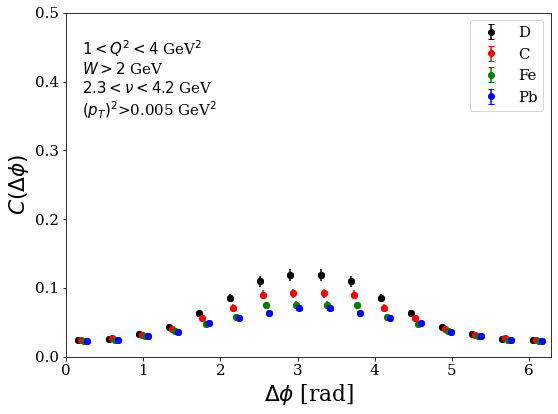

In [91]:
fig, axs = plt.subplots(1,1, figsize=(8,6),sharey='all')
variables = []
#variables.append(("h2_z", "$z_2$",np.linspace(0.05,0.45,9),"h2_truth_z"))
variables.append(("dphi", "$\\Delta\\phi$ [rad]",np.linspace(0,np.pi,9),"dphi_truth"))

expectedSys=7

for i, ((xvar,vartex, bins,xvar_truth)) in enumerate(variables):
    #plt.sca(ax)
    plot_corr_all(xvar,vartex,bins,topo ="2pi",legend=False,xvar_truth=xvar_truth,
                 weight=True, includeGiBUU=False, 
                  query="h1_cm_pt>0.0707 and h2_cm_pt>0.0707" if xvar=='dphi' else "Q2==Q2",
                 mirror=(xvar=='dphi'),band=False,colors='krgb',label_prefix="",
                 sys_err=[0.01*expectedSys]*16)
    
    if i == 0:
        plt.legend()
    plt.gca().set_ylim(0,0.5)
    plt.gca().set_ylabel("$C("+vartex.replace("$","").replace("[GeV]","").replace("[rad]","")+")$")
        #plt.gca().set_ylim(0)
    plt.gca().text(0.2,0.35,"$1<Q^2<4$ GeV$^2$\n$W>2$ GeV\n$2.3<\\nu<4.2$ GeV\n$(p_T)^2$>0.005 GeV$^2$")
plt.tight_layout()
plt.gca().set_xlim(0,2*np.pi)
plt.savefig("images/corr_1d_dphi.pdf")
plt.savefig("images/corr_1d_dphi.png")

debug:  0.28294212105225836
mirror!
mirror!
debug:  0.28294212105225836
mirror!
mirror!
debug:  0.2829421210522584
mirror!
mirror!
debug:  0.2829421210522584
mirror!
mirror!
debug:  0.28294212105225836
mirror!
mirror!
debug:  0.28294212105225836
mirror!
mirror!
debug:  0.2829421210522584
mirror!
mirror!
debug:  0.2829421210522584
mirror!
mirror!


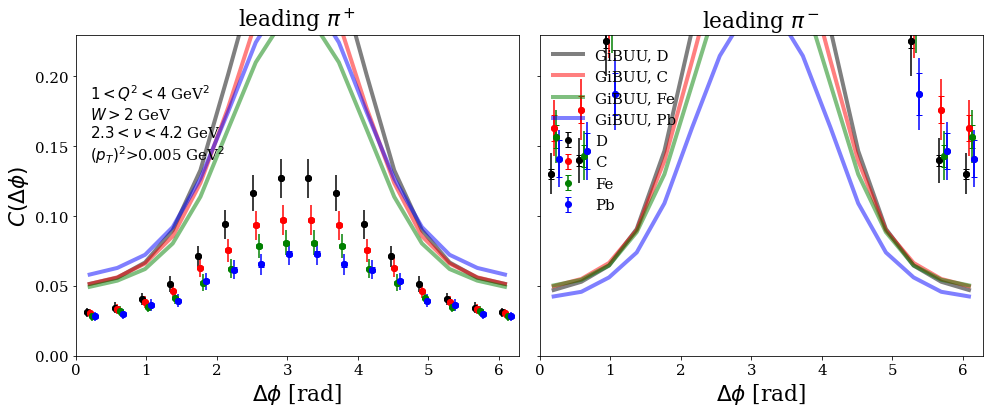

In [98]:
fig, axs = plt.subplots(1,2, figsize=(14,6),sharey='all')
pids = [211, -211]
titles = ["leading $\\pi^+$", "leading $\\pi^-$"]
for j in range(2):
    plt.sca(axs[j])
    
    
    xvar,vartex, bins,xvar_truth= "dphi", "$\\Delta\\phi$ [rad]",np.linspace(0,np.pi,9),"dphi_truth"

    expectedSys=11 # percent

    #plt.sca(ax)
    plot_corr_all(xvar,vartex,bins,topo ="2pi",legend=False,xvar_truth=xvar_truth,
                 weight=True, includeGiBUU=True, query_trig=f"h1_pid=={pids[j]}",
                  query=f"h1_pid=={pids[j]} and h1_cm_pt>0.0707 and h2_cm_pt>0.0707" if xvar=='dphi' else "Q2==Q2",
                 mirror=(xvar=='dphi'),band=False,colors='krgb',label_prefix="",
                 sys_err=[0.01*expectedSys]*16)

    if j == 0:
        plt.gca().text(0.2,0.14,"$1<Q^2<4$ GeV$^2$\n$W>2$ GeV\n$2.3<\\nu<4.2$ GeV\n$(p_T)^2$>0.005 GeV$^2$")
        plt.gca().set_ylabel("$C("+vartex.replace("$","").replace("[GeV]","").replace("[rad]","")+")$")

    else : 
        plt.legend(framealpha=0, loc='upper left')
        plt.ylabel("")
    plt.gca().set_ylim(0,0.23)
            #plt.gca().set_ylim(0)
    plt.title(titles[j])
    plt.gca().set_xlim(0,2*np.pi)
plt.tight_layout()
plt.savefig("images/corr_1d_dphi_charge.pdf")
plt.savefig("images/corr_1d_dphi_charge.png")

In [128]:
print(np.max(dfs_data['D_2pi'].Q2))

3.9107789993286133


In [93]:
print(dfs_data.keys())

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D', 'D_C_2pi', 'D_C_pi_p', 'C_2pi', 'C_pi_p', 'D_Fe_2pi', 'D_Fe_pi_p', 'Fe_2pi', 'Fe_pi_p', 'Pb_2pi', 'Pb_pi_p', 'D_Pb_2pi', 'D_Pb_pi_p', 'GiBUU_D_2pi', 'GiBUU_D_pi_p', 'GiBUU_C_2pi', 'GiBUU_C_pi_p', 'GiBUU_Fe_2pi', 'GiBUU_Fe_pi_p', 'GiBUU_Pb_2pi', 'GiBUU_Pb_pi_p', 'D_2pi', 'D_pi_p'])


In [ ]:
df_mc = dfs_mc['D_2pi']
fig, axs = plt.subplots(2,2,figsize=(14,10),sharey='all')
effs = []
for j,weight in enumerate([True,False]):
    #ymax=0
    effs.append(pd.Series())
    for i in range(4):
        bins=np.linspace(0,3, 7)
        plt.sca(axs[i//2][i%2])
        dphirange=(i*np.pi/4,(i+1)*np.pi/4)
        query_truth="dphi_truth>%s and dphi_truth<%s" % dphirange
        eff = np.histogram(df_mc.query(query_truth).query("h2_z>0").eval("drap_truth"), 
                        bins=bins, 
                        weights=df_mc.query(query_truth).query("h2_z>0").eval("weight_truth") if weight else None)[0]/\
                    np.histogram(df_mc.query(query_truth).eval("drap_truth"), bins=bins, 
                                 weights=df_mc.query(query_truth).eval("weight_truth") if weight else None)[0]
        effs[j] = pd.concat([effs[j],pd.Series(eff)])

        plt.gca().set_ylim(0,1)
        plt.gca().set_title("%.2f<$|\\Delta\\phi|$<%.2f rad" %dphirange)
        plt.gca().set_ylabel("$\epsilon$")
        plt.gca().set_xlabel("$\Delta y$")
        plt.plot(eff)
print(np.sqrt(np.mean((effs[0]-effs[1])**2/(effs[0])**2)))
print(np.std(effs[0])/np.mean(effs[0]))
print(np.std(effs[0])/np.mean(effs[1]))
plt.tight_layout()
plt.savefig("images/efficiency_2d.png")

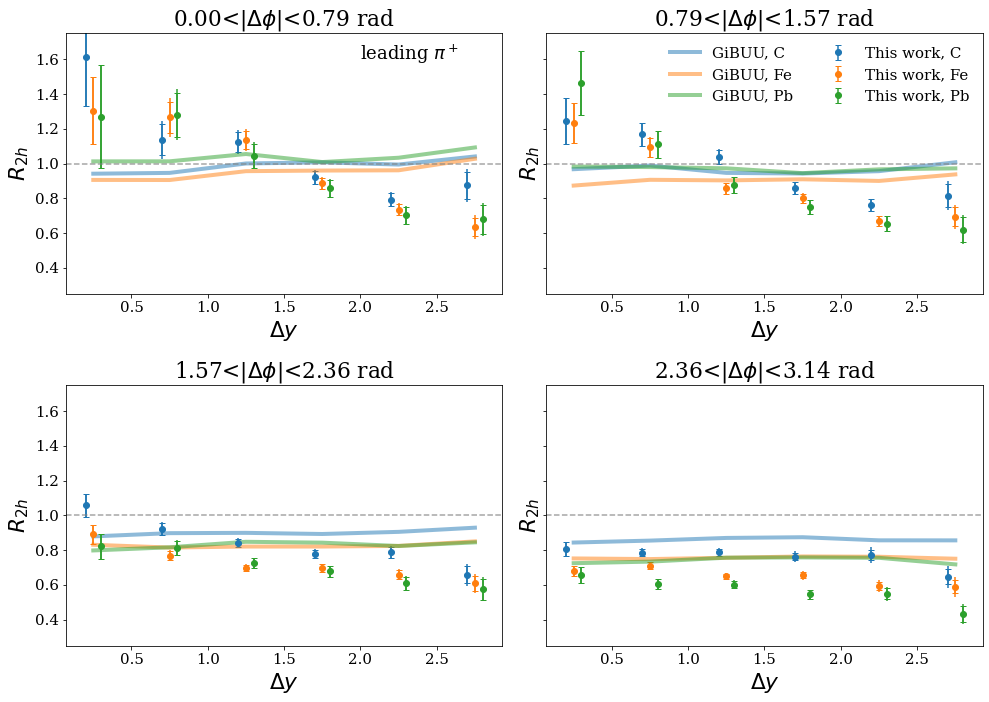

<ipython-input-18-ca4a800828cc>:82: RuntimeWarning: divide by zero encountered in true_divide
  dyc = y/yd*np.hypot(dy/y, dyd/yd)
<ipython-input-18-ca4a800828cc>:82: RuntimeWarning: invalid value encountered in true_divide
  dyc = y/yd*np.hypot(dy/y, dyd/yd)
<ipython-input-18-ca4a800828cc>:83: RuntimeWarning: divide by zero encountered in true_divide
  yc= y/yd
<ipython-input-18-ca4a800828cc>:83: RuntimeWarning: invalid value encountered in true_divide
  yc= y/yd
/home/sebouh/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
<ipython-input-18-ca4a800828cc>:82: RuntimeWarning: invalid value encountered in true_divide
  dyc = y/yd*np.hypot(dy/y, dyd/yd)
<ipython-input-18-ca4a800828cc>:83: RuntimeWarning: invalid value encountered in true_divide
  yc= y/yd
<ipython-input-18-ca4a800828cc>:82: RuntimeWarning: invalid value encountered in true_divide
  dyc = y/

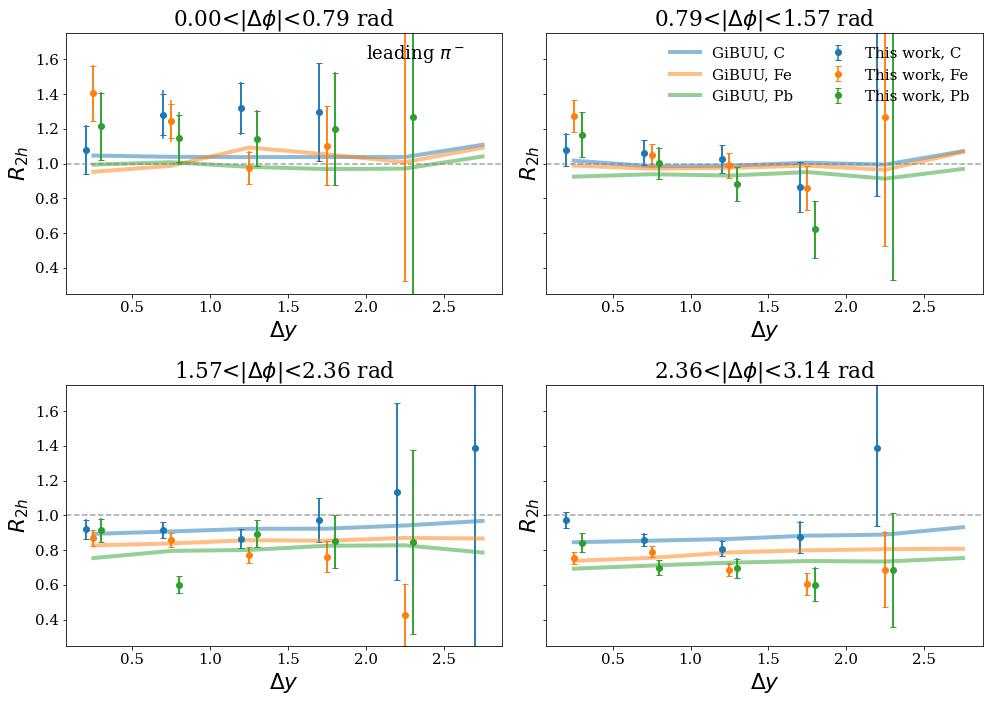

In [25]:
sys_err = {}
sys_err['2pi'] = np.divide([2.9,5.8,3.7,1.7,2.4,6.6,1.9,1.2,1.6,
                            1.0,1.3,6.5,0.6,1.5,1.0,1.6,2.6,5.9,
                            1.1,1.4,2.0,2.8,4.9,7.6],100)
sys_err['pi_p'] = np.divide([13.6,4.3,2.6,1.3,3.0,11.2,3.6,2.2,1.0,1.2,2.6,7.1,1.1,0.8,0.8,1.1,2.4,5.7,2.9,4.1,4.9,5.2,6.0,9.1],100)
for h1_pid in 211, -211:
    for topo in "2pi".split():
        fig, axs = plt.subplots(2,2,figsize=(14,10),sharey='all')
        #ymax=0
        for i in range(4):
            plt.sca(axs[i//2][i%2])

            phirange=(i*np.pi/4,(i+1)*np.pi/4)
            query = f"h1_pid=={h1_pid} and dphi>%s and dphi<%s" % phirange
            plot_R2h_all("drap","$\\Delta y$",np.linspace(0,3.0,7),topo =topo,query=query, 
                         legend=i==1, sys_err=sys_err[topo][i*6:(i+1)*6] if sys_err is not None else None)
            plt.gca().set_title("%.2f<$|\\Delta\\phi|$<%.2f rad" %phirange)
            if topo=='2pi':
                plt.gca().set_ylim(0.25,1.75)
            
        axs[0][0].text(2.0, 1.6, f"leading $\\pi^{'+' if h1_pid==211 else '-'}$", fontsize=18)
            #if plt.gca().get_ylim()[1]>ymax:
            #    ymax=plt.gca().get_ylim()[1]
        #for i in range(4):
        #    axs[i//2][i%2].set_ylim(0,ymax)
        plt.tight_layout()
        plt.savefig(f"images/R2h_{topo}_drap_vs_dphi_leading_{h1_pid}.png")
        plt.show()

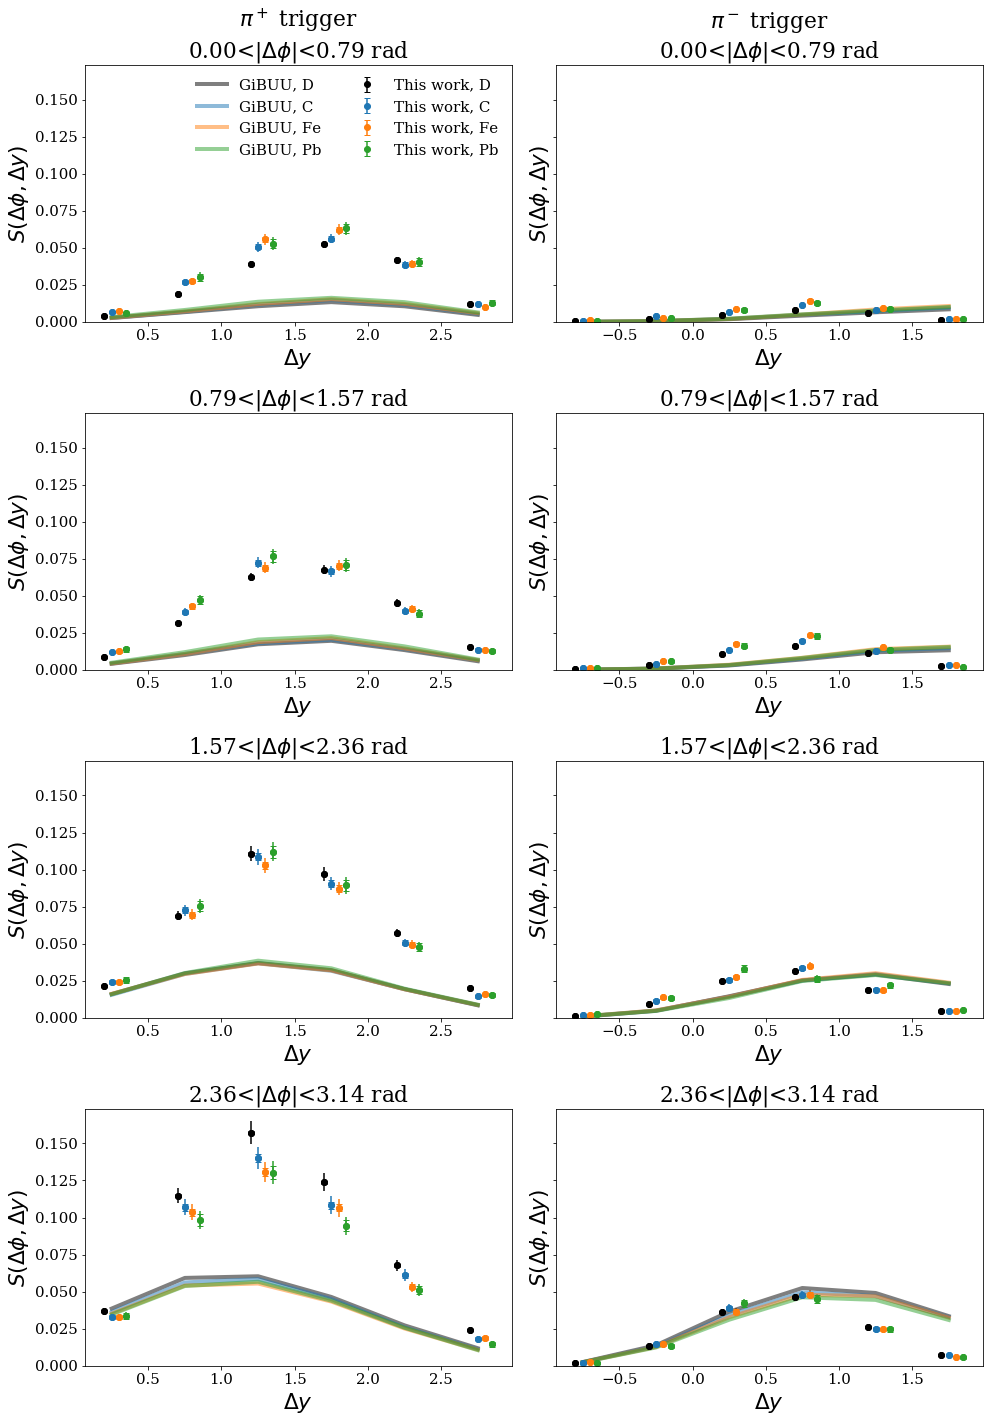

In [164]:
normalized=True
scale = 1
weight=False
sys_err = {}
sys_err['2pi'] = np.divide([5.6,7.2,5.7,4.7,5.2,8.0,4.6,4.4,4.4,4.4,5.2,6.3,4.4,4.3,4.4,4.5,4.6,5.5,4.5,4.5,4.8,5.0,5.8,7.6],100)
sys_err['pi_p'] = np.divide([4.7,4.3,2.3,1.4,4.2,9.7,1.7,2.2,1.4,1.3,
                             2.5,6.8,1.2,0.8,0.9,1.1,1.5,5.7,3.2,4.2,4.9,5.2,6.0,8.5],100)

for topo in "2pi".split():
    fig, axs = plt.subplots(4,2,figsize=(14,20),sharey='all')
    dyrange={211:np.linspace(0,3.0,7), -211:np.linspace(-1,2.0,7)}
    for j,pid in enumerate((211,-211)):
        #ymax=0
        for i in range(4):
            plt.sca(axs[i][j])

            phirange=(i*np.pi/4,(i+1)*np.pi/4)
            query = f"dphi>%s and dphi<%s and h1_pid=={pid}" % phirange
            plot_S_all("drap","$\\Delta y$",dyrange[pid],
                       topo =topo,query=query, 
                         legend=i==0 and j==0, sys_err=sys_err[topo][i*6:(i+1)*6] if sys_err is not None else None,
                         normalized=normalized,includeGiBUU=True,
                         query_truth=f"dphi_truth>%s and dphi_truth<%s and h1_truth_pid == {pid}" % phirange,
                         xvar_truth="drap_truth", weight=weight,scale=scale,
                      query_trig=f"h1_pid={pid}")
            title = "%.2f<$|\\Delta\\phi|$<%.2f rad"%phirange
            if i == 0:
                if j == 0:
                    title = "$\pi^+$ trigger\n"+title
                if j == 1:
                    title = "$\pi^-$ trigger\n"+title
            plt.gca().set_title(title)
            #if plt.gca().get_ylim()[1]>ymax:
            #    ymax=plt.gca().get_ylim()[1]
        #for i in range(4):
        #    axs[i//2][i%2].set_ylim(0,ymax)
        
        #plt.gca().set_ylim(1e-3,1e1)
        #plt.gca().set_yscale('log')
        #if(pid == -211):
        #    axs[0][0].set_ylim(0, .2)
    plt.gca().set_ylim(0)
    plt.tight_layout()
    plt.savefig(f"images/S_{topo}_drap_vs_dphi_{pid}.png")
    plt.show()

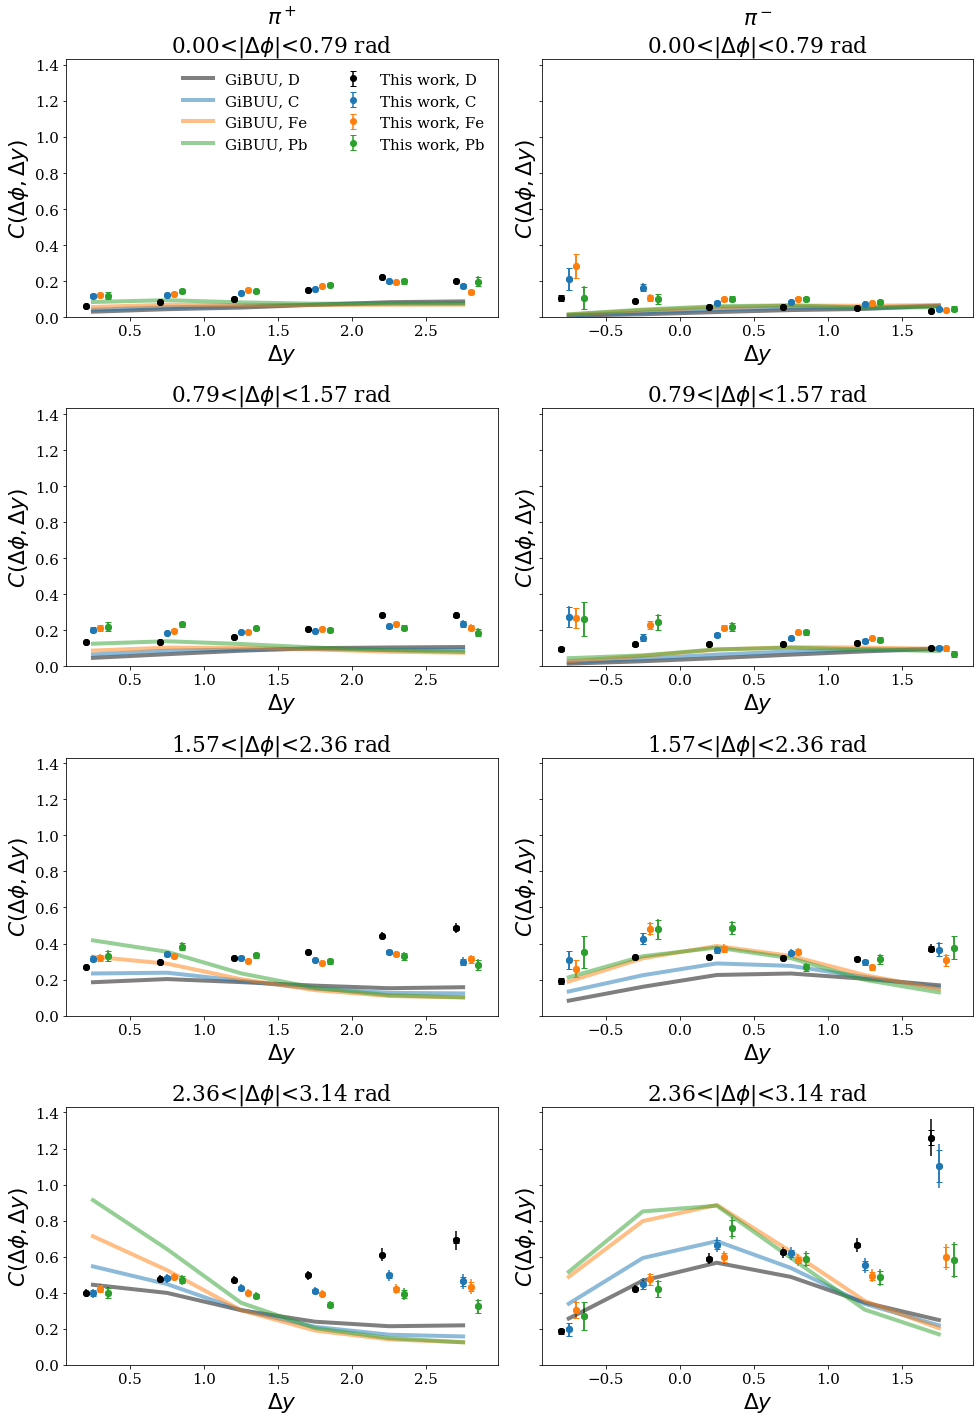

In [165]:
normalized=True
scale = 1
weight=True
sys_err = {}
sys_err['2pi'] = np.divide([5.6,7.2,5.7,4.7,5.2,8.0,4.6,4.4,4.4,4.4,5.2,6.3,4.4,4.3,4.4,4.5,4.6,5.5,4.5,4.5,4.8,5.0,5.8,7.6],100)
sys_err['pi_p'] = np.divide([4.7,4.3,2.3,1.4,4.2,9.7,1.7,2.2,1.4,1.3,
                             2.5,6.8,1.2,0.8,0.9,1.1,1.5,5.7,3.2,4.2,4.9,5.2,6.0,8.5],100)

for topo in "2pi".split():
    fig, axs = plt.subplots(4,2,figsize=(14,20),sharey='all')
    for j,pid in enumerate((211,-211)):
        #ymax=0
        dyrange={211:np.linspace(0,3.0,7), -211:np.linspace(-1,2.0,7)}
        for i in range(4):
            plt.sca(axs[i][j])

            phirange=(i*np.pi/4,(i+1)*np.pi/4)
            query = f"dphi>%s and dphi<%s and h1_pid=={pid}" % phirange
            plot_corr_all("drap","$\\Delta y$",dyrange[pid],topo =topo,query=query, 
                         legend=i==0 and j==0, sys_err=sys_err[topo][i*6:(i+1)*6] if sys_err is not None else None,
                         normalized=normalized,includeGiBUU=True,
                         query_truth=f"dphi_truth>%s and dphi_truth<%s and h1_pid == {pid}" % phirange,
                         xvar_truth="drap_truth", weight=weight,scale=scale)
            title = "%.2f<$|\\Delta\\phi|$<%.2f rad"%phirange
            if i == 0:
                if j == 0:
                    title = "$\pi^+$\n"+title
                if j == 1:
                    title = "$\pi^-$\n"+title
            plt.gca().set_title(title)
            #if plt.gca().get_ylim()[1]>ymax:
            #    ymax=plt.gca().get_ylim()[1]
        #for i in range(4):
        #    axs[i//2][i%2].set_ylim(0,ymax)
        
        #plt.gca().set_ylim(1e-3,1e1)
        #plt.gca().set_yscale('log')
        #if(pid == -211):
        #    axs[0][0].set_ylim(0, .2)
    plt.gca().set_ylim(0)
    plt.tight_layout()
    plt.savefig(f"images/corr_{topo}_drap_vs_dphi_{pid}.png")
    plt.show()

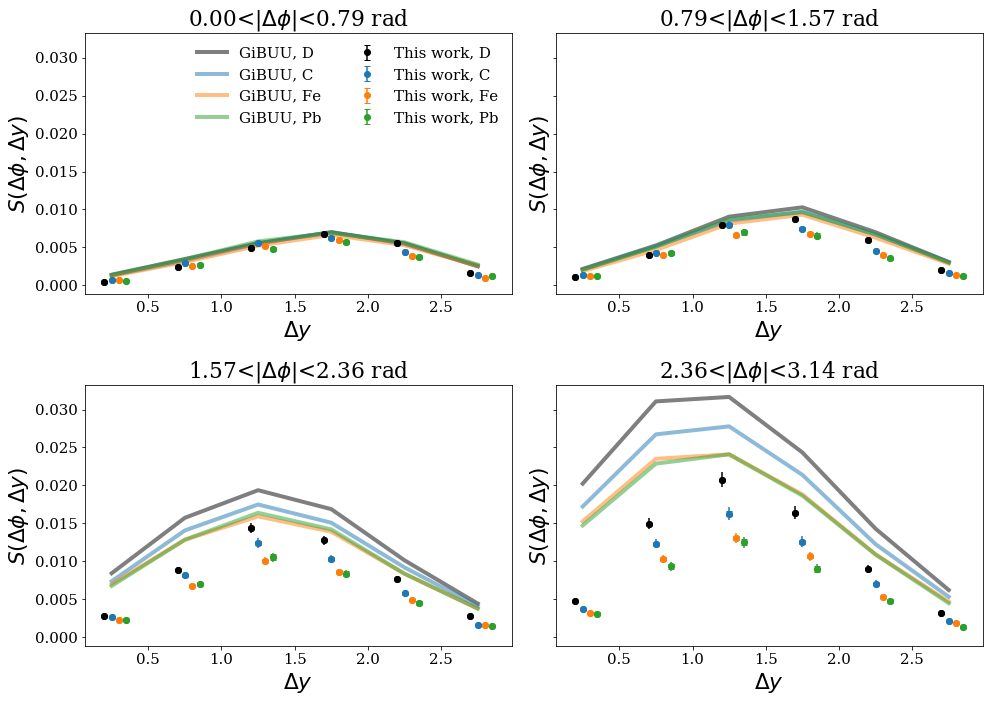

<ipython-input-161-ce1a85066bdc>:32: RuntimeWarning: invalid value encountered in true_divide
  eff = np.histogram(df_mc.query(query_truth).query("h2_z>0").eval(xvar_truth),
<ipython-input-161-ce1a85066bdc>:37: RuntimeWarning: invalid value encountered in true_divide
  y/=eff
<ipython-input-161-ce1a85066bdc>:38: RuntimeWarning: invalid value encountered in true_divide
  dy/=eff


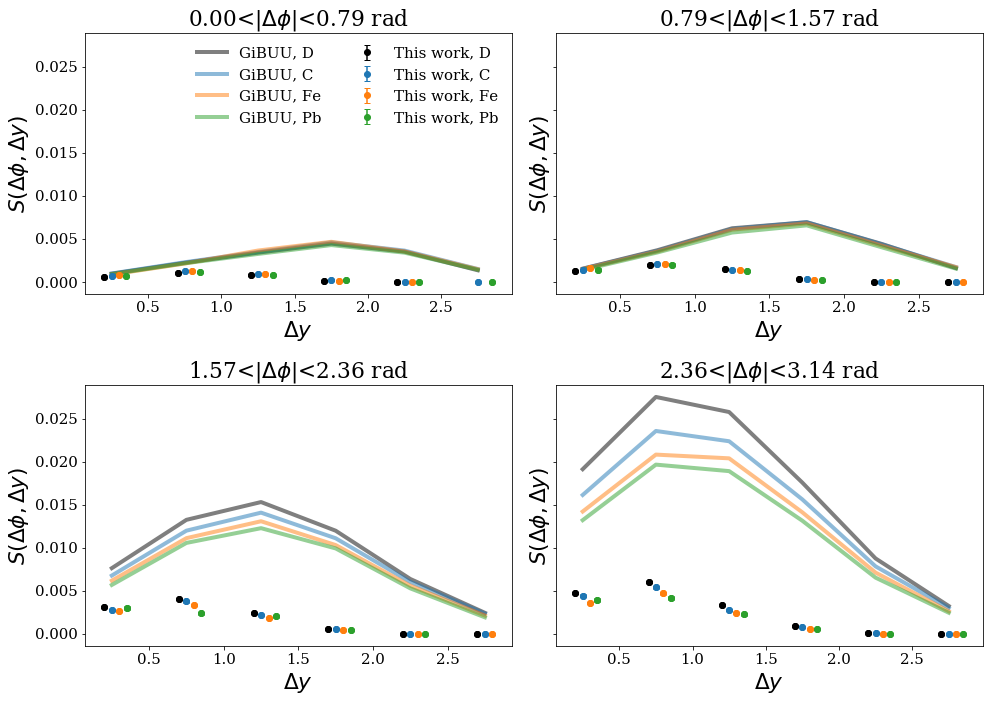

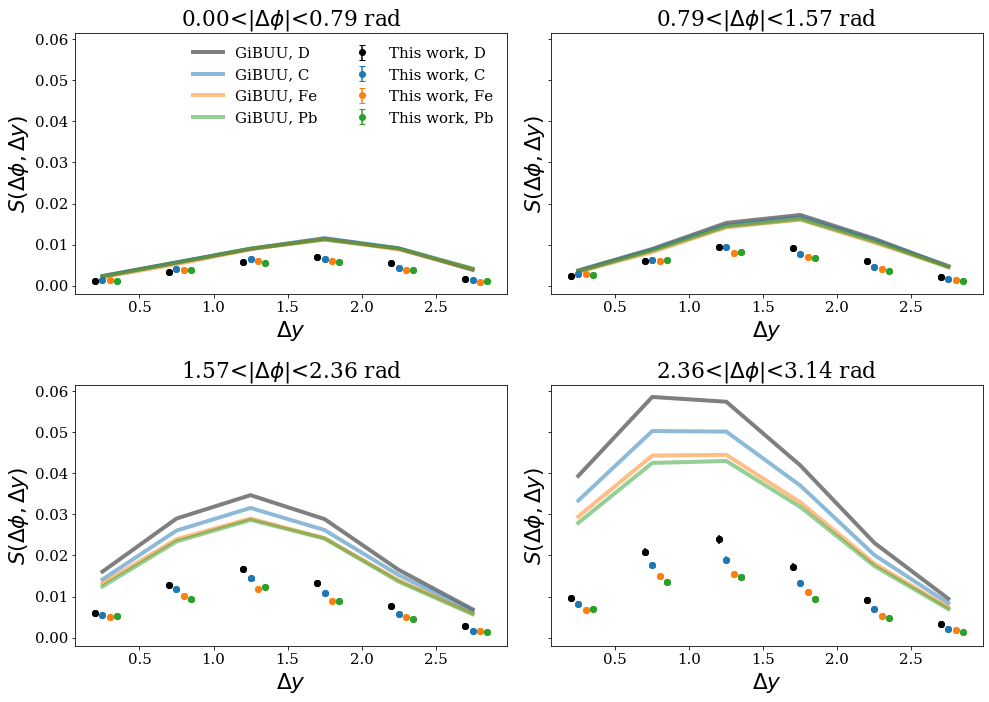

In [168]:
normalized=False
sys_err = {}
sys_err['2pi'] = np.divide([5.6,7.2,5.7,4.7,5.2,8.0,4.6,4.4,4.4,4.4,5.2,6.3,4.4,4.3,4.4,4.5,4.6,5.5,4.5,4.5,4.8,5.0,5.8,7.6],100)
sys_err['pi_p'] = np.divide([4.7,4.3,2.3,1.4,4.2,9.7,1.7,2.2,1.4,1.3,
                             2.5,6.8,1.2,0.8,0.9,1.1,1.5,5.7,3.2,4.2,4.9,5.2,6.0,8.5],100)
for pid in 211,-211,0:
    for topo in "2pi".split():
        fig, axs = plt.subplots(2,2,figsize=(14,10),sharey='all')
        #ymax=0
        for i in range(4):
            plt.sca(axs[i//2][i%2])

            phirange=(i*np.pi/4,(i+1)*np.pi/4)
            pid_query=f"and h1_pid=={pid}" if pid!= 0 else ""
            query = f"dphi>%s and dphi<%s {pid_query}" % phirange
            plot_S_all("drap","$\\Delta y$",np.linspace(0,3.0,7),topo =topo,query=query, 
                         legend=i==0, sys_err=sys_err[topo][i*6:(i+1)*6] if sys_err is not None else None,
                         normalized=normalized,includeGiBUU=True,
                         query_truth=f"dphi_truth>%s and dphi_truth<%s {pid_query}" % phirange,
                         xvar_truth="drap_truth")
            plt.gca().set_title("%.2f<$|\\Delta\\phi|$<%.2f rad" %phirange)
            #if plt.gca().get_ylim()[1]>ymax:
            #    ymax=plt.gca().get_ylim()[1]
        #for i in range(4):
        #    axs[i//2][i%2].set_ylim(0,ymax)
        plt.tight_layout()
        #plt.gca().set_ylim(1e-3,1e1)
        #plt.gca().set_yscale('log')
        #if(pid == -211):
        #    axs[0][0].set_ylim(0, .2)
        plt.savefig(f"images/S_{topo}_drap_vs_dphi_{pid}.png")
        plt.show()

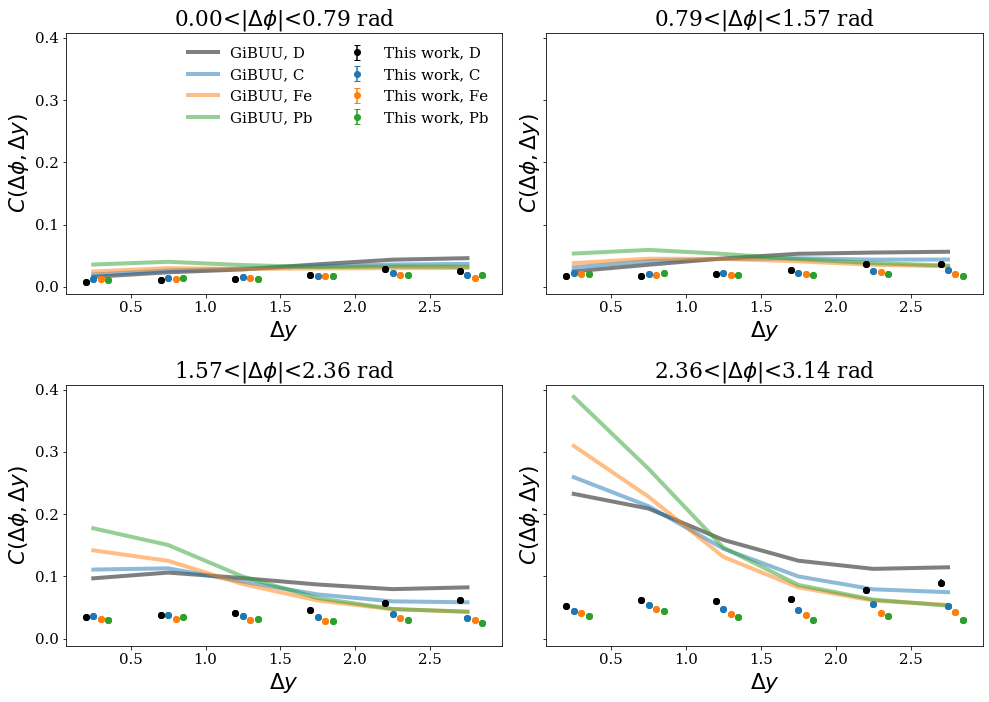

<ipython-input-161-ce1a85066bdc>:32: RuntimeWarning: invalid value encountered in true_divide
  eff = np.histogram(df_mc.query(query_truth).query("h2_z>0").eval(xvar_truth),
<ipython-input-161-ce1a85066bdc>:44: RuntimeWarning: invalid value encountered in true_divide
  dy = y/y_mix*np.sqrt(dy**2/y**2, dy_mix/y_mix**2)
<ipython-input-161-ce1a85066bdc>:45: RuntimeWarning: invalid value encountered in true_divide
  y = y/y_mix
<ipython-input-161-ce1a85066bdc>:37: RuntimeWarning: invalid value encountered in true_divide
  y/=eff
<ipython-input-161-ce1a85066bdc>:38: RuntimeWarning: invalid value encountered in true_divide
  dy/=eff


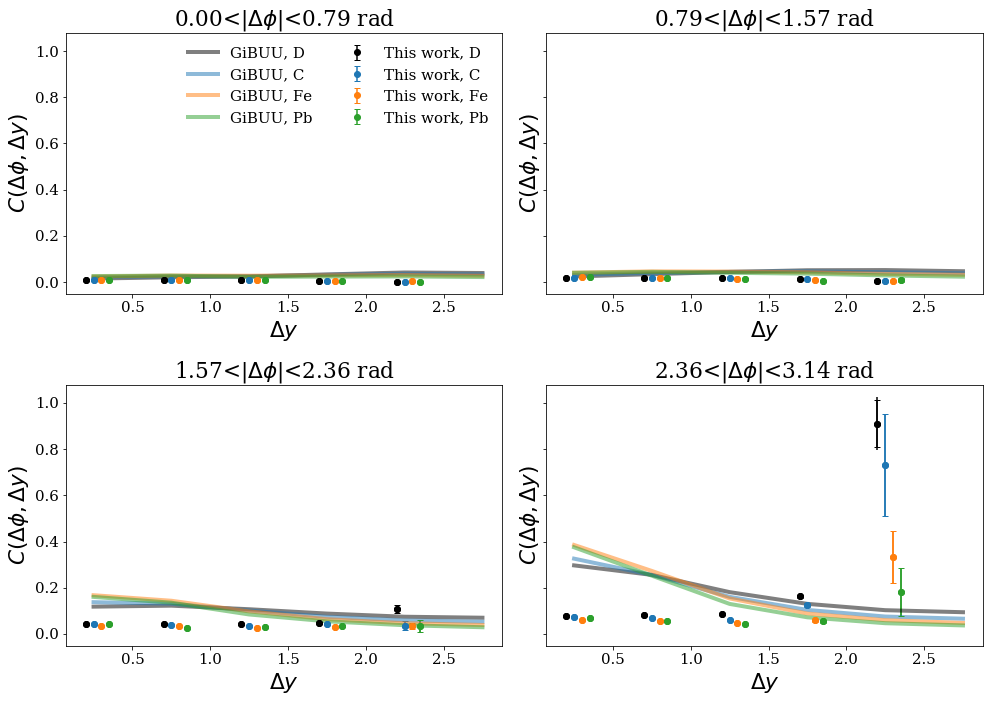

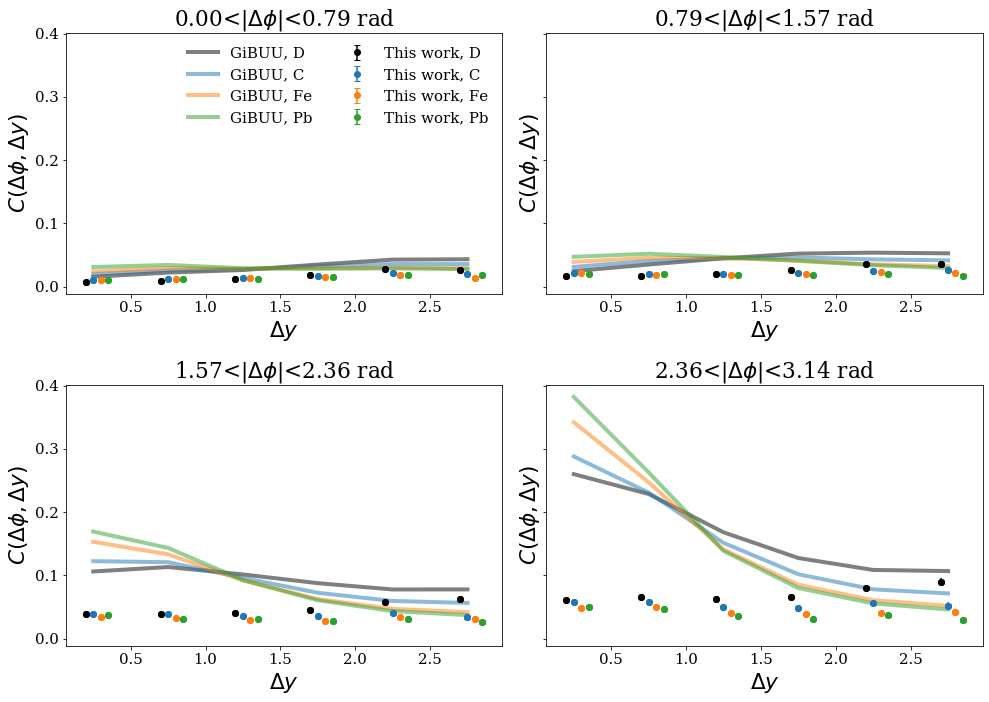

In [167]:
normalized=False
sys_err = {}
sys_err['2pi'] = np.divide([5.6,7.2,5.7,4.7,5.2,8.0,4.6,4.4,4.4,4.4,5.2,6.3,4.4,4.3,4.4,4.5,4.6,5.5,4.5,4.5,4.8,5.0,5.8,7.6],100)
sys_err['pi_p'] = np.divide([4.7,4.3,2.3,1.4,4.2,9.7,1.7,2.2,1.4,1.3,
                             2.5,6.8,1.2,0.8,0.9,1.1,1.5,5.7,3.2,4.2,4.9,5.2,6.0,8.5],100)
for pid in 211,-211,0:
    for topo in "2pi".split():
        fig, axs = plt.subplots(2,2,figsize=(14,10),sharey='all')
        #ymax=0
        for i in range(4):
            plt.sca(axs[i//2][i%2])

            phirange=(i*np.pi/4,(i+1)*np.pi/4)
            pid_query=f"and h1_pid=={pid}" if pid!= 0 else ""
            query = f"dphi>%s and dphi<%s {pid_query}" % phirange
            plot_corr_all("drap","$\\Delta y$",np.linspace(0,3.0,7),topo =topo,query=query, 
                         legend=i==0, sys_err=sys_err[topo][i*6:(i+1)*6] if sys_err is not None else None,
                         normalized=normalized,includeGiBUU=True,
                         query_truth=f"dphi_truth>%s and dphi_truth<%s {pid_query}" % phirange,
                         xvar_truth="drap_truth")
            plt.gca().set_title("%.2f<$|\\Delta\\phi|$<%.2f rad" %phirange)
            #if plt.gca().get_ylim()[1]>ymax:
            #    ymax=plt.gca().get_ylim()[1]
        #for i in range(4):
        #    axs[i//2][i%2].set_ylim(0,ymax)
        plt.tight_layout()
        #plt.gca().set_ylim(1e-3,1e1)
        #plt.gca().set_yscale('log')
        #if(pid == -211):
        #    axs[0][0].set_ylim(0, .2)
        plt.savefig(f"images/corr_{topo}_drap_vs_dphi_{pid}.png")
        plt.show()

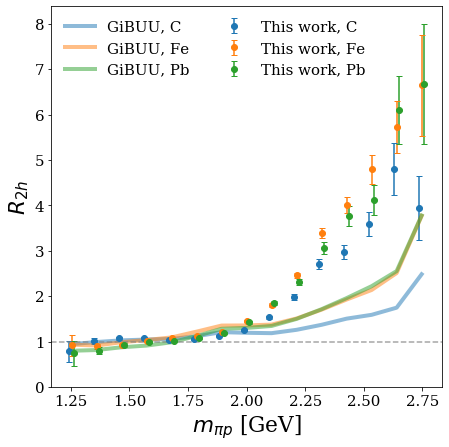

KeyError: 'D_pi_p'

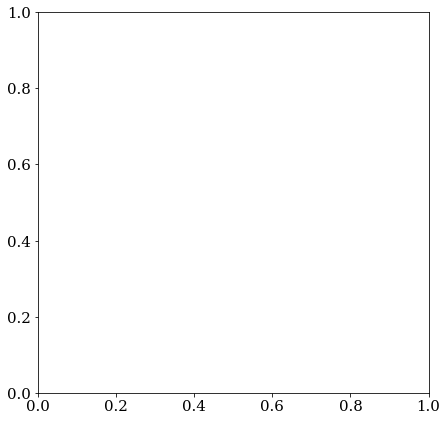

In [178]:
variables = []
variables.append(("pair_mass", "$m_{\\pi p}$ [GeV]",np.linspace(1.2,2.8,16)))
variables.append(("h2_z", "$z_2$",np.linspace(0.2,0.8,14)))
variables.append(("dphi", "$|\\Delta\\phi|$ [rad]",np.linspace(0,np.pi,8)))


for xvar,vartex, bins in variables:
    fig, axs = plt.subplots(1,1,figsize=(7,7))
    plot_R2h_all(xvar,vartex,bins,topo ="pi_p")
    plt.savefig(f"images/R2h_pi_p_{xvar}.png")
    plt.show()
    fig, axs = plt.subplots(1,1,figsize=(7,7))
    plot_corr_all(xvar,vartex,bins,topo ="pi_p")
    plt.savefig(f"images/corr_pi_p_{xvar}.png")
    plt.show()

In [ ]:

imp.reload(correlation_plots)
for label,topo,fillstyle,linestyleFit in zip('$\\pi\\pi$ $\\pi{}p$'.split(),
                                             '_2pi _pi_p'.split(),'full full'.split(), '----'):
    
    dyranges = [(0,0.5), (0.5,1), (1,1.5),(1.5,2)]
    fig,axs = plt.subplots(2,len(dyranges),figsize=(14,7),sharex='all',sharey='row')
    
    for j,dyrange in enumerate(dyranges):
        query = f"h2_z>0.1 and h1_z>0.5"
        if dyrange:
             query += f" and diff_rap_cm>{dyrange[0]} and diff_rap_cm<{dyrange[1]}"
        for a,col in zip('D C Fe Pb'.split(),"krbg"):
            A = dfs_data[a+topo].query(query)
            triggers_A = dfs_trigger[a].query('h1_z>0.5')
            mix_A = dfs_mixed[a+topo].query(query) 

            if a != 'D':
                D = dfs_data['D_'+a+topo].query(query)
                triggers_D = dfs_trigger['D_'+a].query('h1_z>0.5')
                mix_D = dfs_mixed['D_'+a+topo].query(query) 

            plt.sca(axs[0][j])
            #nuclear
            correlation_plots.general_1D_plot(A,None,df_triggers_A=triggers_A,
                          projyrange=(-1,3.0),bins1d=10,
                                                  df_mix_A=mix_A,color=col,label=a,
                                              plotFourier=2,fillstyle=fillstyle,linestyleFit='-' if a == 'D' else '')
            plt.sca(axs[1][j])
            #nuclear
            if a != 'D':
                correlation_plots.general_1D_plot(A,D,df_triggers_A=triggers_A,df_triggers_D=triggers_D,
                          projyrange=(-1,3.0),bins1d=10,
                                                  df_mix_A=mix_A,df_mix_D=mix_D,color=col,label=a,
                                              plotFourier=2 if topo=='_2pi' else 3,fillstyle=fillstyle,linestyleFit='-' if a == 'D' else '')
            plt.gca().set_xlim(0,2*np.pi)

        for ax in axs[1]:
            ax.set_xlabel("$\\Delta\\phi [rad]$")
        axs[1][j].axhline(1,color='0.7', linestyle='--')
        if topo=='_2pi':
            axs[1][j].set_ylim(0,1.5)
        else:
            axs[1][j].set_ylim(0,10)
            
        dyrangestr = f"${dyrange[0]}<\Delta y<{dyrange[1]}$" if dyrange else "all"
        axs[0][j].set_title(dyrangestr,fontsize='large')
    axs[0][0].text(.05,0.85, label,transform=axs[0][0].transAxes,fontsize='x-large')
        
    
    axs[0][0].set_ylabel("$C(\\Delta\\phi)$")
    axs[1][0].set_ylabel("$C_A(\\Delta\\phi)/C_D(\\Delta\\phi)$")
    axs[0][-1].legend(framealpha=0)
    fig.subplots_adjust(hspace=0,wspace=0)
    plt.savefig(image_dir+f"/summary_1d{topo}_slices.pdf",bbox_inches='tight')
    plt.show()

In [ ]:

imp.reload(correlation_plots)
for label,topo,fillstyle,linestyleFit in zip('$\\pi\\pi$ $\\pi{}p$'.split(), '_2pi _pi_p'.split(),'full full'.split(), '- -'.split()):
    for dyrange in None,:
        
        fig,axs = plt.subplots(1,2,figsize=(14,7),sharex='all')
        query = f"h2_z>0.1 and h1_z>0.5"
        if dyrange:
             query += f" and diff_rap_cm>{dyrange[0]} and diff_rap_cm<{dyrange[1]}"
        for a,col in zip('D C Fe Pb'.split(),"krbg"):
            linestyleFit='-' if a == 'D' else '--'
            A = dfs_data[a+topo].query(query)
            triggers_A = dfs_trigger[a].query('h1_z>0.5')
            mix_A = dfs_mixed[a+topo].query(query) 

            if a != 'D':
                D = dfs_data['D_'+a+topo].query(query)
                triggers_D = dfs_trigger['D_'+a].query('h1_z>0.5')
                mix_D = dfs_mixed['D_'+a+topo].query(query) 

            plt.sca(axs[0])
            #nuclear
            correlation_plots.general_1D_plot(A,None,df_triggers_A=triggers_A,
                          projyrange=(0,3.0),bins1d=10,
                                                  df_mix_A=mix_A,color=col,label=a,
                                              plotFourier=3,fillstyle=fillstyle,linestyleFit=linestyleFit)
            plt.sca(axs[1])
            #nuclear
            if a != 'D':
                correlation_plots.general_1D_plot(A,D,df_triggers_A=triggers_A,df_triggers_D=triggers_D,
                          projyrange=(0,3.0),bins1d=10,
                                                  df_mix_A=mix_A,df_mix_D=mix_D,color=col,label=a,
                                              plotFourier=3,fillstyle=fillstyle,linestyleFit=linestyleFit)
            plt.gca().set_xlim(0,2*np.pi)

        for ax in axs:
            ax.set_xlabel("$\\Delta\\phi [rad]$")
        axs[0].set_ylabel("$C(\\Delta\\phi)$")
        axs[1].set_ylabel("$C_A(\\Delta\\phi)/C_D(\\Delta\\phi)$")
        axs[1].axhline(1,color='0.7', linestyle='--')
        if topo=='_2pi':
            axs[1].set_ylim(0,1.2)
        else:
            axs[1].set_ylim(0,4)

        axs[0].text(.05,0.85, label,transform=plt.gca().transAxes,fontsize='x-large')
        axs[0].text(.05,0.75, "1<$Q^2$<4 GeV$^2$\n$y$<0.85",transform=plt.gca().transAxes)
        axs[0].legend(framealpha=0)
        dyrangestr = f"_{dyrange[0]}_{dyrange[1]}" if dyrange else ""
        plt.savefig(image_dir+f"/summary_1d{topo}{dyrangestr}.pdf",bbox_inches='tight')
        plt.show()

C [1.13158001 0.98513923 0.84170094 0.80360638 0.75936856 0.74629567
 0.77403327 0.6779138 ] [0.03251951 0.01943135 0.01487447 0.01371487 0.01305841 0.01813587
 0.03272141 0.04846713]
Fe [1.15480383 0.8928744  0.73665809 0.68837528 0.65207607 0.63500084
 0.59395533 0.54488608] [0.02961515 0.01597286 0.01221362 0.01112805 0.01062558 0.01472252
 0.02411042 0.03855965]
Pb [1.08409243 0.91670085 0.7219897  0.6464233  0.59636981 0.57713245
 0.54373006 0.44121382] [0.04109886 0.02395637 0.0181443  0.01611256 0.01526121 0.02115072
 0.03500827 0.05383221]


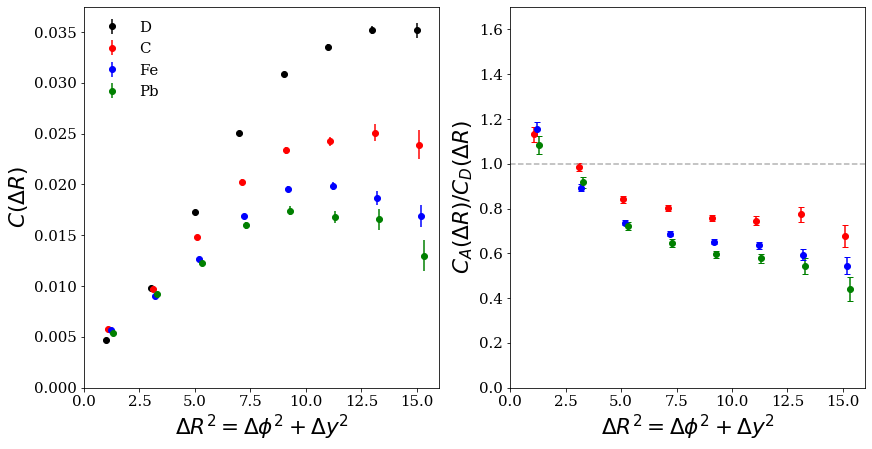

C [3.48679264 2.25342955 1.72896896 1.37263359 1.0352457  1.02263401
 1.12412193 1.07891335] [0.17365009 0.05658215 0.03176423 0.01973625 0.01206036 0.01537388
 0.03305737 0.06091887]
Fe [5.0527962  2.98595289 2.07579645 1.44296835 1.04695608 1.02526491
 1.1828671  1.31783948] [0.20688252 0.06123366 0.03192885 0.017816   0.01088884 0.01380695
 0.03028139 0.0622104 ]
Pb [5.77146688 3.4448267  2.01321095 1.41324531 0.94773557 0.96795533
 1.07723895 1.03925127] [0.26688698 0.08748532 0.0414829  0.02440947 0.01464766 0.01933802
 0.04062428 0.07636945]


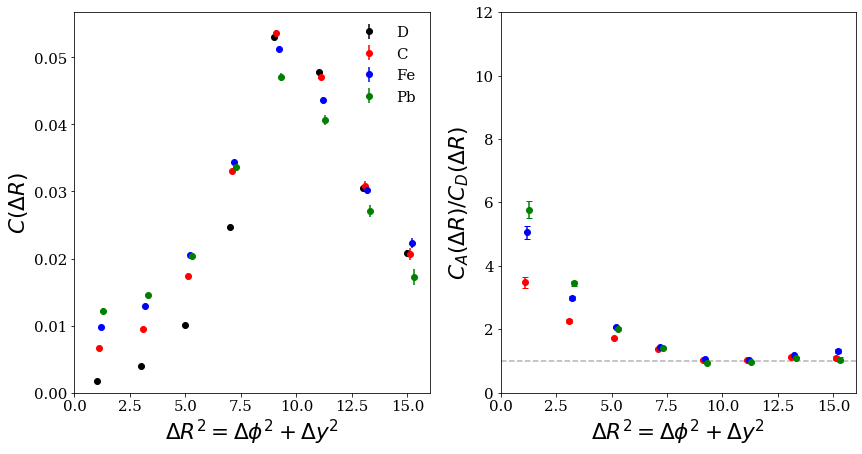

In [72]:
useMix=False
for label,topo,fillstyle,linestyleFit in zip('$\\pi\\pi$ $\\pi{}p$'.split(), '_2pi _pi_p'.split(),'full full'.split(), '- -'.split()):
    for dyrange in None,:
        
        fig,axs = plt.subplots(1,2,figsize=(14,7),sharex='all')
        query = f"h2_z>0.1 and h1_z>0.5"
        if dyrange:
             query += f" and diff_rap_cm>{dyrange[0]} and diff_rap_cm<{dyrange[1]}"
        for j,(a,col) in enumerate(zip('D C Fe Pb'.split(),"krbg")):
            maxval=16
            linestyleFit='-' if a == 'D' else '--'
            A = dfs_data[a+topo].query(query)
            triggers_A = dfs_trigger[a].query('h1_z>0.5')
            mix_A = dfs_mixed[a+topo].query(query) 

            if a != 'D':
                D = dfs_data['D_'+a+topo].query(query)
                triggers_D = dfs_trigger['D_'+a].query('h1_z>0.5')
                mix_D = dfs_mixed['D_'+a+topo].query(query) 
            bins=8
            plt.sca(axs[0])
            shift = j*.1
            #nuclear
            plot_hypot(A,None,df_triggers_A=triggers_A,bins=bins,shift=shift,maxval=maxval,
                                                  df_mix_A=mix_A,color=col,label=a,fillstyle=fillstyle,linestyleFit=linestyleFit)
            plt.sca(axs[1])
            #nuclear
            if a != 'D':
                plot_hypot(A,D,df_triggers_A=triggers_A,df_triggers_D=triggers_D,
                          bins=bins, df_mix_A=mix_A if useMix else None,df_mix_D=mix_D if useMix else None,color=col,label=a,
                                           fillstyle=fillstyle,linestyleFit=linestyleFit,shift=shift,maxval=maxval)
            plt.gca().set_xlim(0,maxval)

        for ax in axs:
            ax.set_xlabel("$\\Delta R^2 = \\Delta\\phi^2+\\Delta y^2$")
        axs[0].set_ylabel("$C(\\Delta R)$")
        axs[1].set_ylabel("$C_A(\\Delta R)/C_D(\\Delta R)$")
        axs[1].axhline(1,color='0.7', linestyle='--')
        if topo=='_2pi':
            axs[1].set_ylim(0,1.7)
        else:
            axs[1].set_ylim(0,12)
        axs[0].set_ylim(0)

        axs[0].text(.05,0.85, label,transform=plt.gca().transAxes,fontsize='x-large')
        axs[0].text(.05,0.75, "1<$Q^2$<4 GeV$^2$\n$y$<0.85",transform=plt.gca().transAxes)
        axs[0].legend(framealpha=0)
        dyrangestr = f"_{dyrange[0]}_{dyrange[1]}" if dyrange else ""
        plt.savefig(image_dir+f"/hypot_1d{topo}{dyrangestr}.pdf",bbox_inches='tight')
        plt.show()

(array([2.74836762, 2.70410401, 2.38621083, 2.71215194, 2.72824779,
        2.64776851, 2.66386437, 2.39828272, 2.61155283, 2.52302562,
        2.51497769, 2.63972058, 2.45059426, 2.34999515, 2.32987533,
        2.34194722, 2.26951586, 2.30170758, 2.18098865, 2.28963569,
        2.35804308, 2.18501261, 2.1528209 , 1.93552683, 2.06026972,
        2.2091564 , 2.1528209 , 1.90333511, 1.9838144 , 1.81883186,
        1.91138304, 1.74237654, 1.89528718, 1.71018483, 1.76249636,
        1.72628068, 1.56934608, 1.54117833, 1.73835258, 1.69811293,
        1.56129815, 1.63775347, 1.48484283, 1.70616086, 1.47277093,
        1.4204594 , 1.54922626, 1.51301058, 1.38826768, 1.38424372,
        1.28766858, 1.39229165, 1.239381  , 1.22730911, 1.26754875,
        1.17097361, 1.11463811, 1.07842243, 1.1830455 , 1.09049433,
        1.00599107, 1.07842243, 1.09854225, 1.00599107, 0.82893665,
        0.9134399 , 0.84100854, 0.89734404, 0.76857718, 0.788697  ,
        0.76455322, 0.70419375, 0.73638547, 0.68

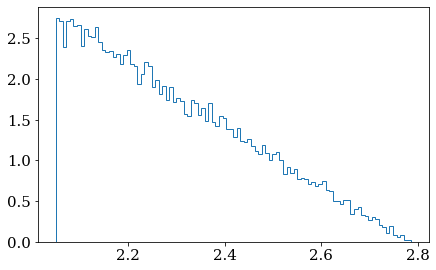

In [44]:
df = dfs_data['D_pi_p']

plt.hist(df.W,bins=100, histtype='step',density=True)


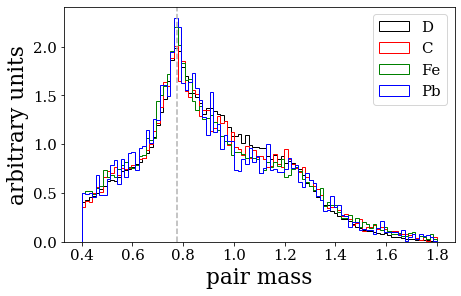

In [20]:

for a,col in zip('D C Fe Pb'.split(),'krgb'): 
    df = dfs_data[f'{a}_2pi']
    plt.hist(df.query('h2_z>0.15').pair_mass,bins=100,range=(0.4, 1.8),
             histtype='step', density = True, color=col, label = a)
plt.axvline(.7754, color='0.7', linestyle='--')
plt.legend()
plt.gca().set_xlabel('pair mass')
plt.gca().set_ylabel('arbitrary units')
plt.show()

In [21]:
df = dfs_data[f'{a}_2pi']
side_band= len(df.query('pair_mass>0.6 and pair_mass<0.7 or pair_mass>0.9 and pair_mass<1.0'))
core = len(df.query('pair_mass>0.7 and pair_mass<0.9'))
print((core-side_band)/len(df))

0.1086564146992997


0.03461948764911905
0.033618447849108626
0.03413878562577447
0.03260771384698762


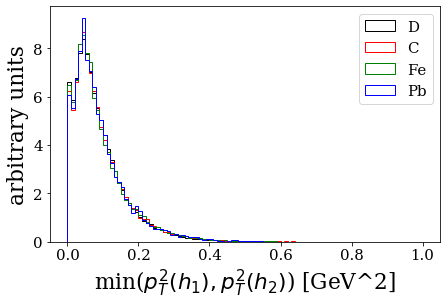

In [304]:
for a,col in zip('D C Fe Pb'.split(),'krgb'): 
    df = dfs_data[f'{a}_2pi']
    plt.hist(df.eval("h1_cm_pt**2*(h1_cm_pt<h2_cm_pt)+h2_cm_pt**2*(h2_cm_pt<h1_cm_pt)"),bins=100,range=(0, 1.0),
             histtype='step', density = True, color=col, label = a)
    print(len(df.query("h1_cm_pt**2*(h1_cm_pt<h2_cm_pt)+h2_cm_pt**2*(h2_cm_pt<h1_cm_pt)<0.005"))/len(df))
    
plt.legend()
plt.gca().set_xlabel('min($p^2_T(h_1),p^2_T(h_2)$) [GeV^2]')
plt.gca().set_ylabel('arbitrary units')
plt.savefig("images/pT2.png")
plt.show()

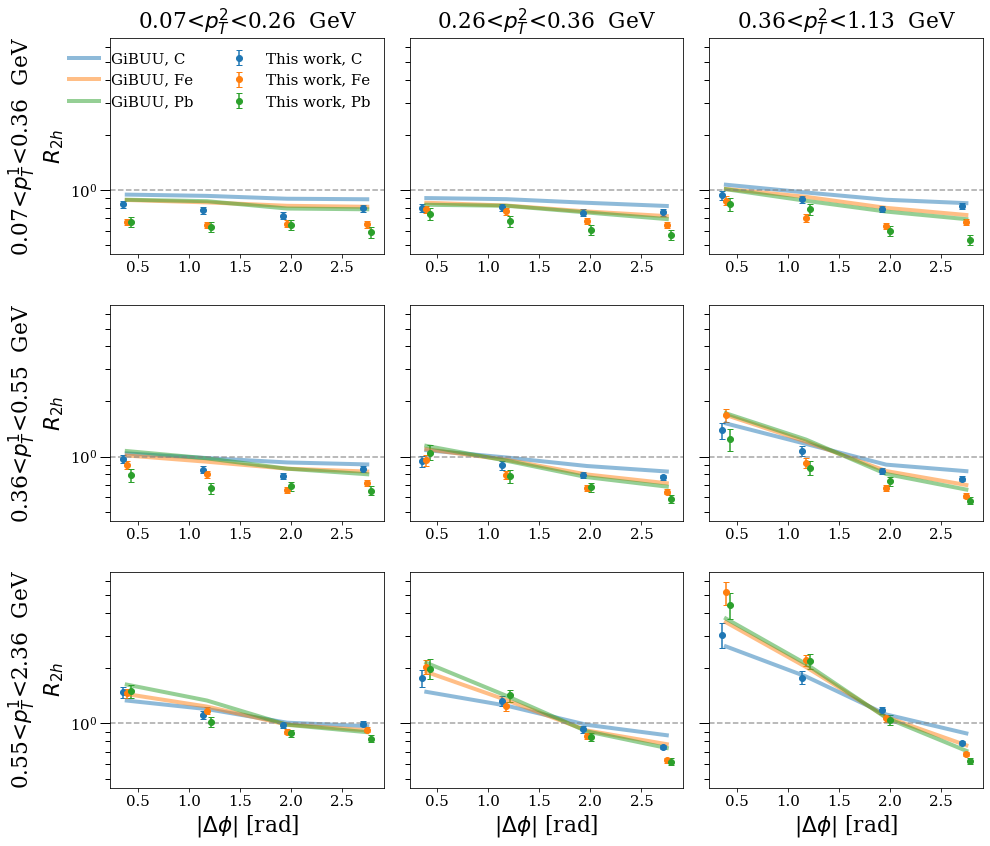

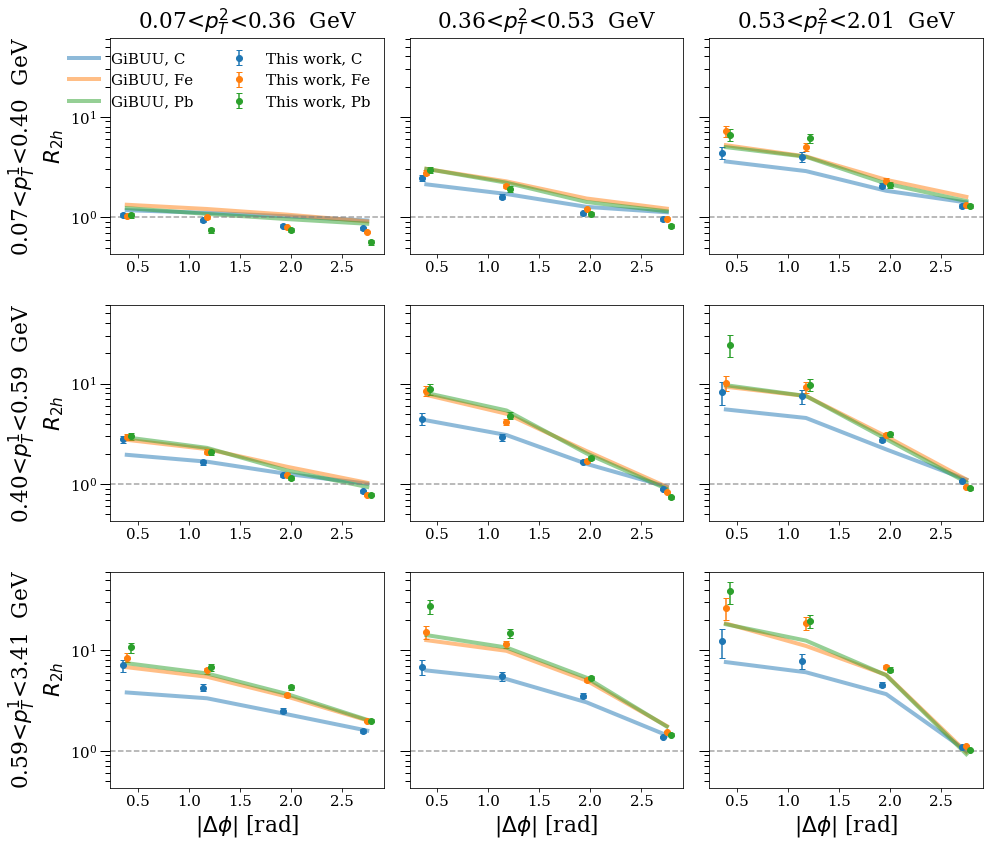

In [82]:
imp.reload(misc_util)
dphi=misc_util.BinnedVariable("dphi", "$|\\Delta\\phi|$", np.linspace(0,np.pi,5), "rad")

pt1 = misc_util.BinnedVariable("h1_cm_pt", "$p_T^1$", np.linspace(0.1,2,5), " GeV")
pt2 = misc_util.BinnedVariable("h2_cm_pt", "$p_T^2$", np.linspace(0.1,2,5), " GeV")

#pt1.auto_bins(df)
for topo in '2pi pi_p'.split():
    df = dfs_data[f'D_{topo}'].query("h1_cm_pt**2>0.005 and h2_cm_pt**2>0.005")
    pt1.auto_bins(df,3,"quantile")
    pt2.auto_bins(df,3,"quantile")
    fig,axs = plt.subplots(3,3,figsize=(14,12),sharey='all')
    for i in range(3):
        for j in range(3):
            plt.sca(axs[i][j])
            for isData in True,False:
                for k,a,col in zip((0,1,2),"C Fe Pb".split(),"tab:blue tab:orange tab:green".split()):
                    if isData:
                        trigA = dfs_trigger[a]
                        trigD = dfs_trigger["D_"+a]
                        #trigA = pt1.query(dfs_trigger[a],i)
                        #trigD = pt1.query(dfs_trigger["D_"+a],i)
                        dfA = pt2.query(pt1.query(dfs_data[f"{a}_{topo}"],i),j)
                        dfD = pt2.query(pt1.query(dfs_data[f"D_{a}_{topo}"],i),j)
                    else:
                        trigA = dfs_trigger["GiBUU_"+a]
                        trigD = dfs_trigger["GiBUU_D"]
                        #trigA = pt1.query(dfs_trigger["GiBUU_"+a],i)
                        #trigD = pt1.query(dfs_trigger["GiBUU_D"],i)
                        dfA = pt2.query(pt1.query(dfs_data[f"GiBUU_{a}_{topo}"],i),j)
                        dfD = pt2.query(pt1.query(dfs_data[f"GiBUU_D_{topo}"],i),j)
                    
                    
                    bins,xvar = dphi._bins, dphi._var
                    plot1d(dfA,dfD,
                       df_triggers_A=trigA,
                        df_triggers_D=trigD,color=col,
                        xvar=xvar, bins=bins,label = "This work, " + a if isData else f"GiBUU, {a}",
                           shift=(bins[1]-bins[0])*(k-1)/20,band=(not isData))
            plt.axhline(1,color='0.5',alpha=0.7,linestyle='--')
            if i==0:
                plt.gca().set_title(pt2.slice_label(j))
            if j == 0:
                plt.gca().set_ylabel(pt1.slice_label(i)+"\n$R_{2h}$")
                if i == 0:
                    plt.legend(framealpha=0,ncol=2)
            if i==2:
                plt.gca().set_xlabel(dphi.axis_label())
            #plt.gca().set_title(pt1.slice_label(i)+"\n"+pt2.slice_label(j))
            plt.gca().set_yscale('log')
            plt.gca().tick_params('y', length=10, width=1, which='major')
            plt.gca().tick_params('y', length=5, width=1, which='minor')
    plt.tight_layout()
    plt.savefig(f'images/R2h_dphi_pt_both_{topo}.png')
    plt.show()
    
                #plot1d(dfs_data[f"GiBUU_{a}_{topo}"],dfs_data[f"GiBUU_D_{topo}"],
                #   df_triggers_A=dfs_trigger["GiBUU_"+a],
                #   df_triggers_D=dfs_trigger["GiBUU_"+"D"],color=col, query=query,
                #    xvar=xvar, bins=bins,label = "GiBUU, " + a,shift=(bins[1]-bins[0])*(i-1)/10,band=True)
            #plt.legend(framealpha=0,ncol=2)


(array([0.10883116, 0.12331952, 0.1223087 , 0.1349439 , 0.15044307,
        0.16526837, 0.16846929, 0.18750632, 0.19559284, 0.21580916,
        0.23046599, 0.23720476, 0.2572526 , 0.28353381, 0.29212575,
        0.30644563, 0.31149971, 0.33677011, 0.34991071, 0.36625223,
        0.38933252, 0.40685333, 0.42336332, 0.42521648, 0.45604636,
        0.44745443, 0.47104013, 0.48974022, 0.49934297, 0.50860878,
        0.49513124, 0.51888541, 0.54668284, 0.52815122, 0.53910172,
        0.54263958, 0.54971529, 0.56454058, 0.56184508, 0.53623774,
        0.56673068, 0.55578018, 0.55493783, 0.55864416, 0.55830722,
        0.56066579, 0.54803059, 0.51147276, 0.50810337, 0.5057448 ,
        0.50658715, 0.49580511, 0.50473399, 0.48586543, 0.46952391,
        0.46110044, 0.45048688, 0.43330301, 0.43684086, 0.41780383,
        0.40567405, 0.38933252, 0.39118569, 0.39455507, 0.38023518,
        0.36945315, 0.36119815, 0.33693858, 0.33205297, 0.33053674,
        0.3258196 , 0.31065737, 0.29515819, 0.27

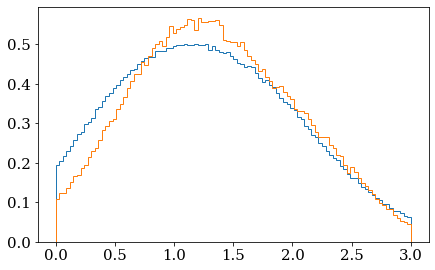

In [106]:
plt.hist(dfs_data['GiBUU_D_2pi'].drap,bins=100,density=True,histtype='step',range=(0,3))
plt.hist(dfs_data['D_2pi'].drap,bins=100,density=True,histtype='step',range=(0,3))

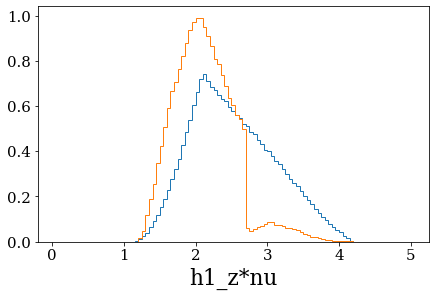

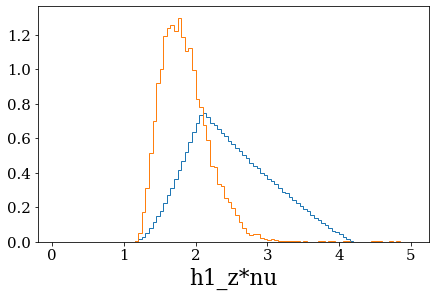

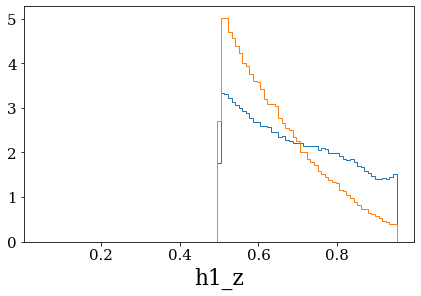

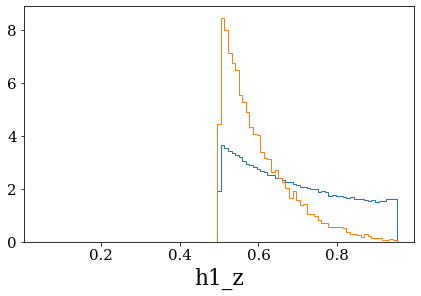

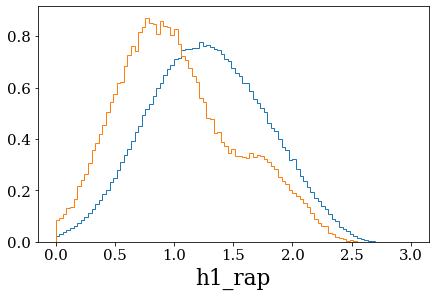

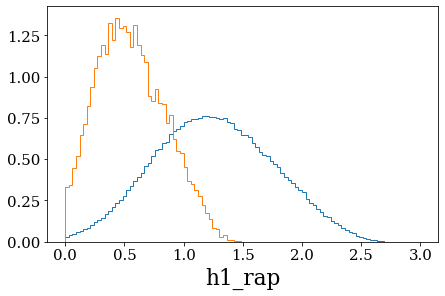

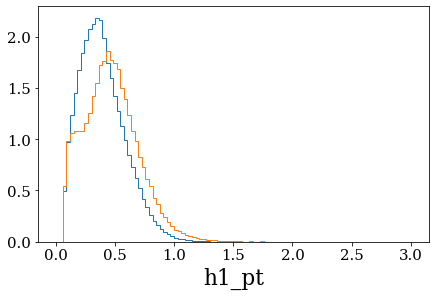

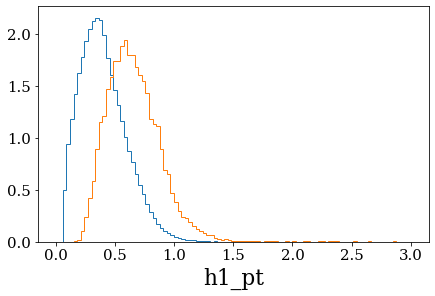

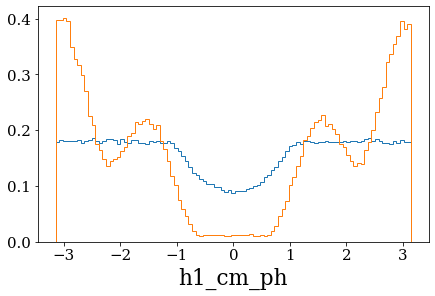

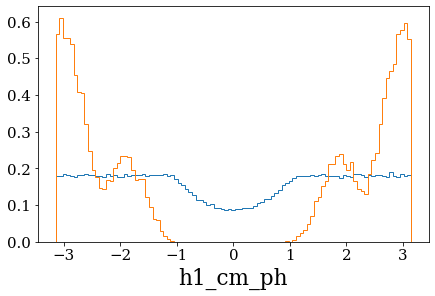

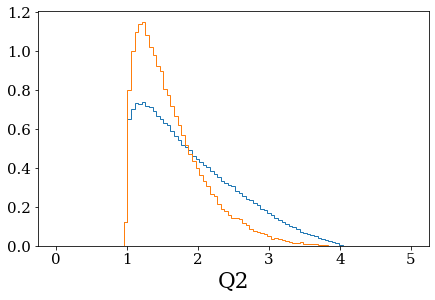

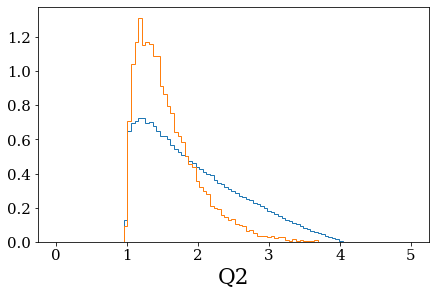

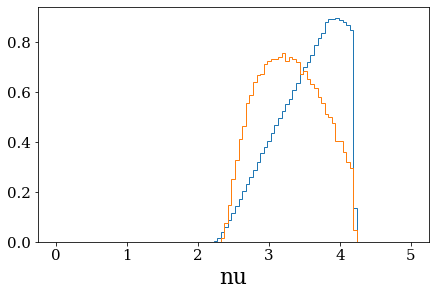

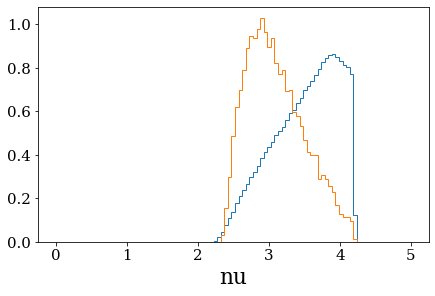

In [49]:
for xvar in [{'expr':'h1_z*nu', 'bins':np.linspace(0.05, 5,100)},
             {'expr':'h1_z', 'bins':np.linspace(0.05, 0.95,100)},
            {'expr':'h1_rap', 'bins':np.linspace(0, 3,100)},
            {'expr':'h1_pt', 'bins':np.linspace(0, 3,100)},
            {'expr':'h1_cm_ph', 'bins':np.linspace(-np.pi, np.pi,100)},
            {'expr':'Q2', 'bins':np.linspace(0, 5,100)},
            {'expr':'nu', 'bins':np.linspace(0, 5,100)}]:
    for pid in 211,-211:
        plt.hist(dfs_trigger['GiBUU_Pb'].query(f'h1_pid=={pid}').eval(xvar['expr']),bins=xvar['bins'], density=True,histtype='step')
        plt.hist(dfs_trigger['Pb'].query(f'h1_pid=={pid}').eval(xvar['expr'].replace('_pt','_cm_pt')),bins=xvar['bins'],density=True,histtype='step')
        plt.gca().set_xlabel(xvar['expr'])
        plt.show()

In [198]:
dfs_trigger['GiBUU_D'].columns

Index(['h1_pid', 'h1_xf', 'h1_z', 'h1_rap', 'ycm', 'h1_pt', 'Q2', 'x', 'nu',
       'W', 'h1_cm_ph', 'h1_cm_th', 'h1_cm_pt', 'mass', 'pstar', 'plstar',
       'eta', 'TargType', 'h1_ph', 'h1_th', 'pos_x', 'pos_y', 'pos_z',
       'h1_FidCutPiPlus', 'inelasticity', 'h1_e', 'h1_p'],
      dtype='object')

In [116]:
print(dfs_data['GiBUU_D'].columns)

Index(['dphi', 'dphi_lab', 'qt', 'drap', 'h1_z', 'h2_z', 'z_tot', 'h1_xf',
       'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph',
       'h2_cm_ph', 'h1_cm_pt', 'h2_cm_pt', 'h1_cm_th', 'h2_cm_th', 'pair_mass',
       'pair_pt', 'mx_eh1h2', 'Q2', 'x', 'nu', 'W', 'h1_ph', 'h1_th', 'h2_ph',
       'h2_th', 'pos_x', 'pos_y', 'pos_z', 'pos_x_asso', 'pos_y_asso',
       'pos_z_asso', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_e', 'h1_p',
       'h2_e', 'h2_p'],
      dtype='object')


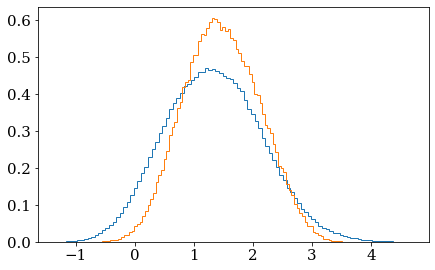

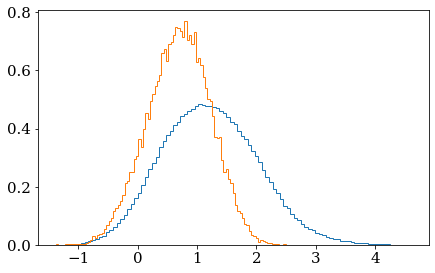

In [135]:
for pid in 211,-211:
    plt.hist(dfs_data['GiBUU_D_2pi'].query(f"h1_pid=={pid}").eval(f'drap'), bins=100,histtype='step', density=True)
    plt.hist(dfs_data['D_2pi'].query(f"h1_pid=={pid}").eval(f'drap'), bins=100,histtype='step', density=True)
    plt.show()

mirror!
mirror!
mirror!
mirror!


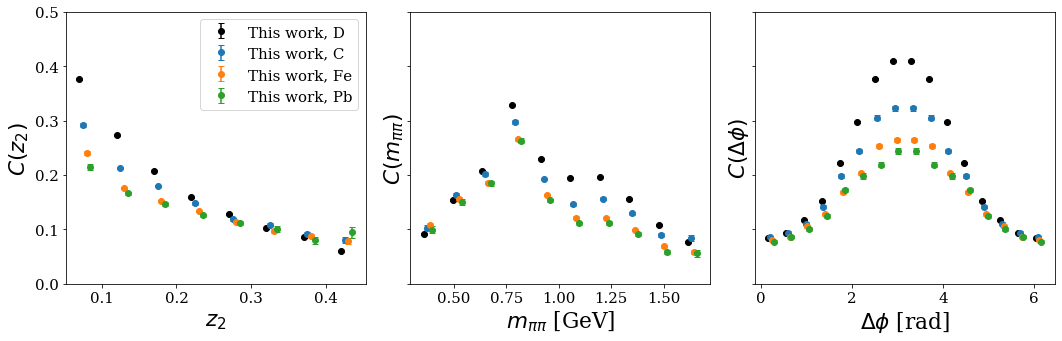

In [94]:
fig, axs = plt.subplots(1,3, figsize=(15,5),sharey='all')
variables = []
variables.append(("h2_z", "$z_2$",np.linspace(0.05,0.45,9),"h2_truth_z"))
variables.append(("pair_mass", "$m_{\\pi\\pi}$ [GeV]",np.linspace(0.3,1.7,11),"pair_mass_truth"))
variables.append(("dphi", "$\\Delta\\phi$ [rad]",np.linspace(0,np.pi,9),"dphi_truth"))


for i, ((xvar,vartex, bins,xvar_truth),ax) in enumerate(zip(variables, axs)):
    plt.sca(ax)
    plot_corr_all(xvar,vartex,bins,topo ="2pi",legend=False,xvar_truth=xvar_truth,
                 weight=True, includeGiBUU=False, 
                  query="h1_cm_pt>0.0707 and h2_cm_pt>0.0707" if xvar=='dphi' else "Q2==Q2",
                 mirror=(xvar=='dphi'))
    if i == 0:
        plt.legend()
    plt.gca().set_ylim(0,0.5)
    plt.gca().set_ylabel("$C("+vartex.replace("$","").replace("[GeV]","").replace("[rad]","")+")$")
        #plt.gca().set_ylim(0)
plt.tight_layout()
plt.savefig("images/corr_1d_z2_mpipi_dphi.pdf")
plt.savefig("images/corr_1d_z2_mpipi_dphi.png")

In [110]:
import collections
collections.invert

AttributeError: module 'collections' has no attribute 'invert'

<ipython-input-17-ca4a800828cc>:82: RuntimeWarning: divide by zero encountered in true_divide
  dyc = y/yd*np.hypot(dy/y, dyd/yd)
<ipython-input-17-ca4a800828cc>:82: RuntimeWarning: invalid value encountered in true_divide
  dyc = y/yd*np.hypot(dy/y, dyd/yd)
<ipython-input-17-ca4a800828cc>:83: RuntimeWarning: divide by zero encountered in true_divide
  yc= y/yd
<ipython-input-17-ca4a800828cc>:83: RuntimeWarning: invalid value encountered in true_divide
  yc= y/yd


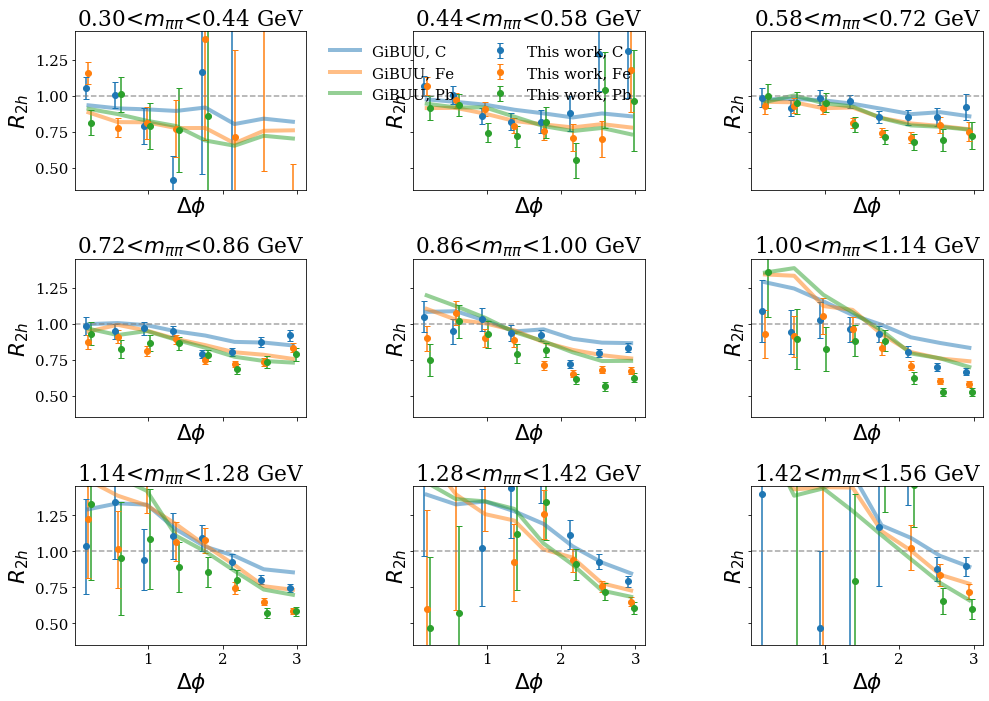

In [26]:
fig, axs = plt.subplots(3,3,figsize=(14,10),sharey='all',sharex='all')
#ymax=0
topo = '2pi'
for i in range(9):
    plt.sca(axs[i//3][i%3])

    mrange=(.3+i*.14,.3+(i+1)*.14)
    query = "pair_mass>%s and pair_mass<%s" % mrange
    plot_R2h_all("dphi","$\\Delta\phi$",np.linspace(0,3.14,9),topo =topo,query=query, 
                 legend=i==1, sys_err=None)
    plt.gca().set_title("%.2f<$m_{\pi\pi}$<%.2f GeV" %mrange)
    if topo=='2pi':
        plt.gca().set_ylim(0.35,1.45)
    #if plt.gca().get_ylim()[1]>ymax:
    #    ymax=plt.gca().get_ylim()[1]
#for i in range(4):
#    axs[i//2][i%2].set_ylim(0,ymax)
plt.tight_layout()
plt.savefig(f"images/R2h_{topo}_drap_vs_dphi.png")
plt.show()

In [28]:
print(dfs_data['D'].columns)

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'z_tot', 'h1_e',
       'h1_p', 'h2_e', 'h2_p', 'h1_mass2_TOF', 'h2_mass2_TOF'],
      dtype='object')
